In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 13, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['figure.autolayout'] = True

In [3]:
df = pd.read_excel("ECommerce_Dataset.xlsx", sheet_name="E Comm")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving ECommerce_Dataset.xlsx to ECommerce_Dataset.xlsx


In [5]:
import io

df = pd.read_excel(io.BytesIO(uploaded['ECommerce_Dataset.xlsx']),sheet_name="E Comm")

In [4]:
df.sample(10)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
4653       54654      0    18.0         Mobile Phone         2   
4414       54415      0     3.0         Mobile Phone         3   
2002       52003      0     2.0                Phone         1   
1036       51037      0    11.0         Mobile Phone         1   
3870       53871      0    10.0                Phone         1   
2642       52643      1     NaN                Phone         2   
3498       53499      0     3.0         Mobile Phone         1   
2622       52623      0    19.0         Mobile Phone         1   
472        50473      0    15.0         Mobile Phone         1   
1050       51051      0    12.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
4653              7.0           Debit Card  Female             3.0   
4414             27.0             E wallet    Male             3.0   
2002              NaN                   CC  Female             3.0   
1036              8.0          Credit Card  Female             2.0   
3870             14.0           Debit Card    Male             4.0   
2642             26.0                   CC  Female             3.0   
3498             35.0           Debit Card  Female             4.0   
2622              8.0          Credit Card    Male             2.0   
472               6.0           Debit Card  Female             2.0   
1050             18.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
4653                         5  Laptop & Accessory                  3   
4414                         4  Laptop & Accessory                  1   
2002                         4              Mobile                  1   
1036                         4             Fashion                  3   
3870                         4        Mobile Phone                  4   
2642                         3              Mobile                  4   
3498                         4        Mobile Phone                  2   
2622                         3              Others                  1   
472                          4  Laptop & Accessory                  2   
1050                         3  Laptop & Accessory                  4   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
4653        Single                6         0                         12.0   
4414       Married                4         0                         15.0   
2002       Married                7         0                         14.0   
1036       Married                4         1                         19.0   
3870        Single                4         0                         12.0   
2642       Married                1         1                         11.0   
3498       Married                6         0                         23.0   
2622       Married                8         1                          NaN   
472       Divorced               10         1                         13.0   
1050       Married                5         0                         21.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
4653         2.0         2.0                3.0          184.85  
4414         2.0         2.0                3.0          194.31  
2002         1.0         1.0                3.0          125.32  
1036         1.0         1.0                2.0          177.56  
3870         1.0         2.0                4.0          145.13  
2642         0.0         1.0                4.0          121.48  
3498         1.0         2.0                8.0          150.14  
2622         2.0         2.0                2.0          293.28  
472          0.0         1.0                2.0          160.62  
1050         1.0         1.0                0.0          152.95

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
#memeriksa kolom yang mmeiliki missing values
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
#memeriksa data yang duplikat
df.duplicated().any()

False

In [8]:
#Memisahkan data berdasar jenis data
#Data Numeric

numerical = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'int32') | (df.dtypes == int) | (df.dtypes == 'float64') | (df.dtypes == 'float32') |(df.dtypes == float)].columns.tolist()
numerical

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [9]:
#Data Categorical

categorical_num = ['Churn','CityTier','SatisfactionScore','Complain']
categorical_num

['Churn', 'CityTier', 'SatisfactionScore', 'Complain']

In [10]:
#Data Target
target = df['Churn']
#Churn adalah nilai yang menunjukkan apakah pelanggan berhenti berlangganan (1) atau tidak (0)

In [11]:
a = df[numerical].describe().T
a

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Churn                            0.00      0.00      0.0000      1.00  
Tenure                           2.00      9.00     16.0000     61.00  
CityTier                         1.00      1.00      3.0000      3.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00  
SatisfactionScore                2.00      3.00      4.0000      5.00  
NumberOfAddress                  2.00      3.00      6.0000     22.00  
Complain                         0.00      0.00      1.0000      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

In [12]:
# Menambah baris data 'rasio' untuk persenan data yang kosong/NaN
a['NullCount'] = df.isna().sum()
a['Ratio'] = round(a['NullCount']/a['count'],3)
a

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  \
CustomerID                   51408.25  52815.50  54222.7500  55630.00   
Churn                            0.00      0.00      0.0000      1.00   
Tenure                           2.00      9.00     16.0000     61.00   
CityTier                         1.00      1.00      3.0000      3.00   
WarehouseToHome                  9.00     14.00     20.0000    127.00   
HourSpendOnApp                   2.00      3.00      3.0000      5.00   
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00   
SatisfactionScore                2.00      3.00      4.0000      5.00   
NumberOfAddress                  2.00      3.00      6.0000     22.00   
Complain                         0.00      0.00      1.0000      1.00   
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00   
CouponUsed                       1.00      1.00      2.0000     16.00   
OrderCount                       1.00      2.00      3.0000     16.00   
DaySinceLastOrder                2.00      3.00      7.0000     46.00   
CashbackAmount                 145.77    163.28    196.3925    324.99   

                             NullCount  Ratio  
CustomerID                           0  0.000  
Churn                                0  0.000  
Tenure                             264  0.049  
CityTier                             0  0.000  
WarehouseToHome                    251  0.047  
HourSpendOnApp                     255  0.047  
NumberOfDeviceRegistered             0  0.000  
SatisfactionScore                    0  0.000  
NumberOfAddress                      0  0.000  
Complain                             0  0.000  
OrderAmountHikeFromlastYear        265  0.049  
CouponUsed                         256  0.048  
OrderCount                         258  0.048  
DaySinceLastOrder                  307  0.058  
CashbackAmount                       0  0.000

In [13]:
df[categorical_num].describe().T

count      mean       std  min  25%  50%  75%  max
Churn              5630.0  0.168384  0.374240  0.0  0.0  0.0  0.0  1.0
CityTier           5630.0  1.654707  0.915389  1.0  1.0  1.0  3.0  3.0
SatisfactionScore  5630.0  3.066785  1.380194  1.0  2.0  3.0  4.0  5.0
Complain           5630.0  0.284902  0.451408  0.0  0.0  0.0  1.0  1.0

In [14]:
categorical = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']

In [15]:
df[categorical].describe().T

count unique                 top  freq
PreferredLoginDevice  5630      3        Mobile Phone  2765
PreferredPaymentMode  5630      7          Debit Card  2314
Gender                5630      2                Male  3384
PreferedOrderCat      5630      6  Laptop & Accessory  2050
MaritalStatus         5630      3             Married  2986

In [16]:
#menghitung jumlah value dari masing2 kolom (kategori)
for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



In [17]:
nums = df[numerical].describe().T
nums['unique'] = df[numerical].nunique().values.T
nums['range'] = round(nums['max'] - nums['min'], 2)
nums['variance'] = round((nums['std'])**2, 2)
nums['IQR'] = round(nums['75%']- nums['25%'], 2)

central = ['mean', '25%', '50%', '75%']
spread = ['min', 'max', 'range', 'std', 'variance', 'IQR']

nums[['count', 'unique'] + central + spread]

count  unique          mean       25%       50%  \
CustomerID                   5630.0    5630  52815.500000  51408.25  52815.50   
Churn                        5630.0       2      0.168384      0.00      0.00   
Tenure                       5366.0      36     10.189899      2.00      9.00   
CityTier                     5630.0       3      1.654707      1.00      1.00   
WarehouseToHome              5379.0      34     15.639896      9.00     14.00   
HourSpendOnApp               5375.0       6      2.931535      2.00      3.00   
NumberOfDeviceRegistered     5630.0       6      3.688988      3.00      4.00   
SatisfactionScore            5630.0       5      3.066785      2.00      3.00   
NumberOfAddress              5630.0      15      4.214032      2.00      3.00   
Complain                     5630.0       2      0.284902      0.00      0.00   
OrderAmountHikeFromlastYear  5365.0      16     15.707922     13.00     15.00   
CouponUsed                   5374.0      17      1.751023      1.00      1.00   
OrderCount                   5372.0      16      3.008004      1.00      2.00   
DaySinceLastOrder            5323.0      22      4.543491      2.00      3.00   
CashbackAmount               5630.0    2586    177.223030    145.77    163.28   

                                    75%      min       max    range  \
CustomerID                   54222.7500  50001.0  55630.00  5629.00   
Churn                            0.0000      0.0      1.00     1.00   
Tenure                          16.0000      0.0     61.00    61.00   
CityTier                         3.0000      1.0      3.00     2.00   
WarehouseToHome                 20.0000      5.0    127.00   122.00   
HourSpendOnApp                   3.0000      0.0      5.00     5.00   
NumberOfDeviceRegistered         4.0000      1.0      6.00     5.00   
SatisfactionScore                4.0000      1.0      5.00     4.00   
NumberOfAddress                  6.0000      1.0     22.00    21.00   
Complain                         1.0000      0.0      1.00     1.00   
OrderAmountHikeFromlastYear     18.0000     11.0     26.00    15.00   
CouponUsed                       2.0000      0.0     16.00    16.00   
OrderCount                       3.0000      1.0     16.00    15.00   
DaySinceLastOrder                7.0000      0.0     46.00    46.00   
CashbackAmount                 196.3925      0.0    324.99   324.99   

                                     std    variance      IQR  
CustomerID                   1625.385339  2641877.50  2814.50  
Churn                           0.374240        0.14     0.00  
Tenure                          8.557241       73.23    14.00  
CityTier                        0.915389        0.84     2.00  
WarehouseToHome                 8.531475       72.79    11.00  
HourSpendOnApp                  0.721926        0.52     1.00  
NumberOfDeviceRegistered        1.023999        1.05     1.00  
SatisfactionScore               1.380194        1.90     2.00  
NumberOfAddress                 2.583586        6.67     4.00  
Complain                        0.451408        0.20     1.00  
OrderAmountHikeFromlastYear     3.675485       13.51     5.00  
CouponUsed                      1.894621        3.59     1.00  
OrderCount                      2.939680        8.64     2.00  
DaySinceLastOrder               3.654433       13.35     5.00  
CashbackAmount                 49.207036     2421.33    50.62

## Insight Descriptive Analysis

1) Baris data yang ada missing values serta rasionya :
- **Tenure** = 4,9%
- **WareHouseToHome** = 4,7%
- **HourSpendOnApp** = 4,7%
- **OrderAmountHikeFromlastYear** = 4,9%
- **CouponUsed** = 4,8%
- **OrderCount** = 4,8%
- **DaySinceLastOrder** = 5,8%

2) Kolom dengan tipe data kurang sesuai (float64 >> int64)
- Tenure
- HourSpendOnApp
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder

3) Tidak ada data duplikat

4) Kolom data numerical yang memiliki nilai min/max terlalu jauh dari mean dan median:
- **Tenure**: min 0, max 61, mean 10, median 9
- **WarehouseToHome**: min 5, max 127, mean 15, median 14
- NumberOfAddress: min 1, max 22, mean 4, median 3
- OrderAmountHikeFromlastYear: min 11, max 26, mean 15, median 15
- CouponUsed: min 0, max 16, mean 1, median 1
- OrderCount: min 1, max 16, mean 3, median 2
- **DaySinceLastOrder**: min 0, max 46, mean 4, median 3
- **CashbackAmount**: min 0, max 324, mean 177, median 163

5) Pada kolom **PreferredLoginDevice** antara **Mobile Phone** dan **Phone** sepertinya jenis yang sama jadi digabung saja

6) Pada kolom **PreferredPaymentMode**:
- **Credit Card** dan **CC** itu sama, jadi akan digabung
- **Cash on Delivery** dan **COD** itu juga sama, jadi akan digabung
- awal ada **7** data unique karena ada yang sama jadi dikurangi tinggal **5** kategori

7) Pada kolom **PreferredOrderCat** antara **Mobile Phone** dan **Mobile** sepertinya jenis yang sama jadi digabung saja

In [18]:
#mengubah value count pada beberapa kolom (digabung yg kategorinya sama)
df.loc[df['PreferredLoginDevice']=='Mobile Phone','PreferredLoginDevice'] = 'Phone'
df['PreferredPaymentMode'].replace({'CC':'Credit Card','Cash on Delivery':'COD'},inplace=True)
df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'}, inplace=True)

for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom PreferredLoginDevice:
Phone       3996
Computer    1634
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



### Proporsi Fitur Kategori
Apakah frekuensi dari nilai yang paling umum timpang?
- PreferredLoginDevice, top frequency mobile phone = 70,97%
- PreferredPaymentMode, top frequency Debit Card = 41,10 %
- Gender, top frequency Gender = 60,10 %
- PreferedOrderCat, top frequency mobile phone = 36,94 %
- MaritalStatus, top frequency Married = 53,30 %

# Univariate Analysis

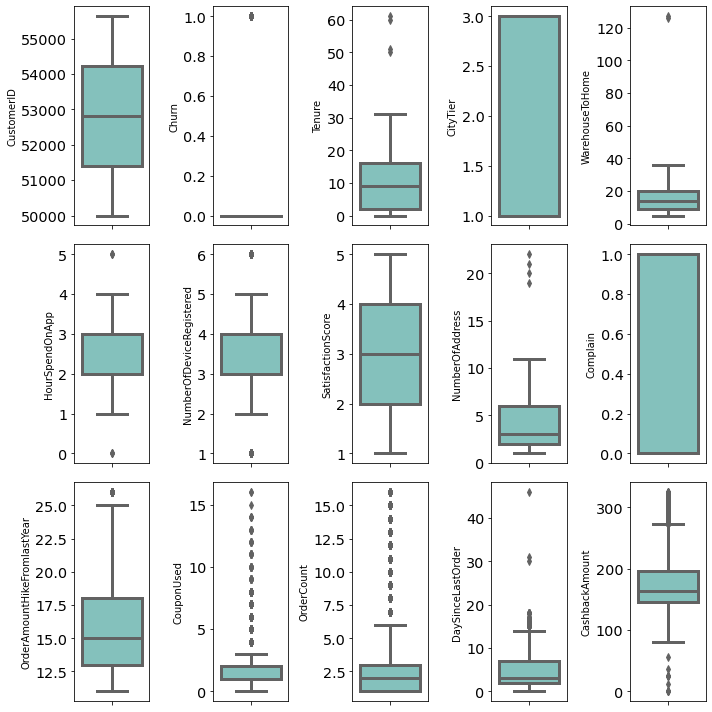

In [19]:
#visualisasi untuk  melihat outlier
plt.figure(figsize=(10,10))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[numerical[i]], palette='GnBu', orient='v')
    plt.tight_layout()

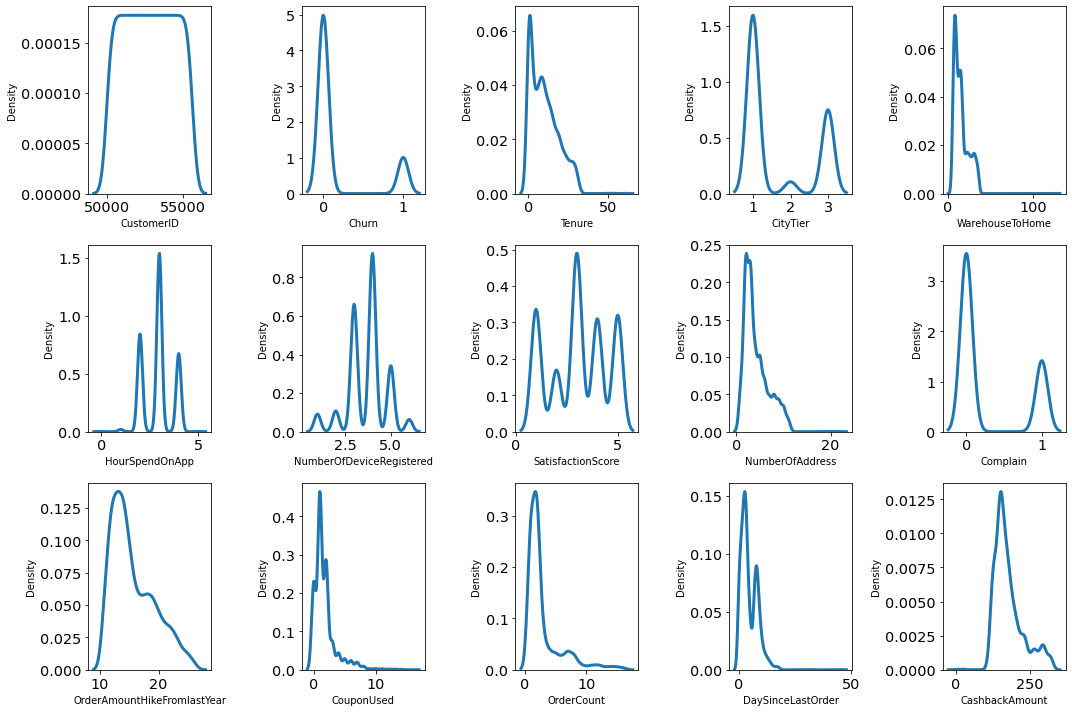

In [20]:
plt.figure(figsize=(15,10))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[numerical[i]], palette='GnBu')
    plt.xlabel(numerical[i])
    plt.tight_layout()

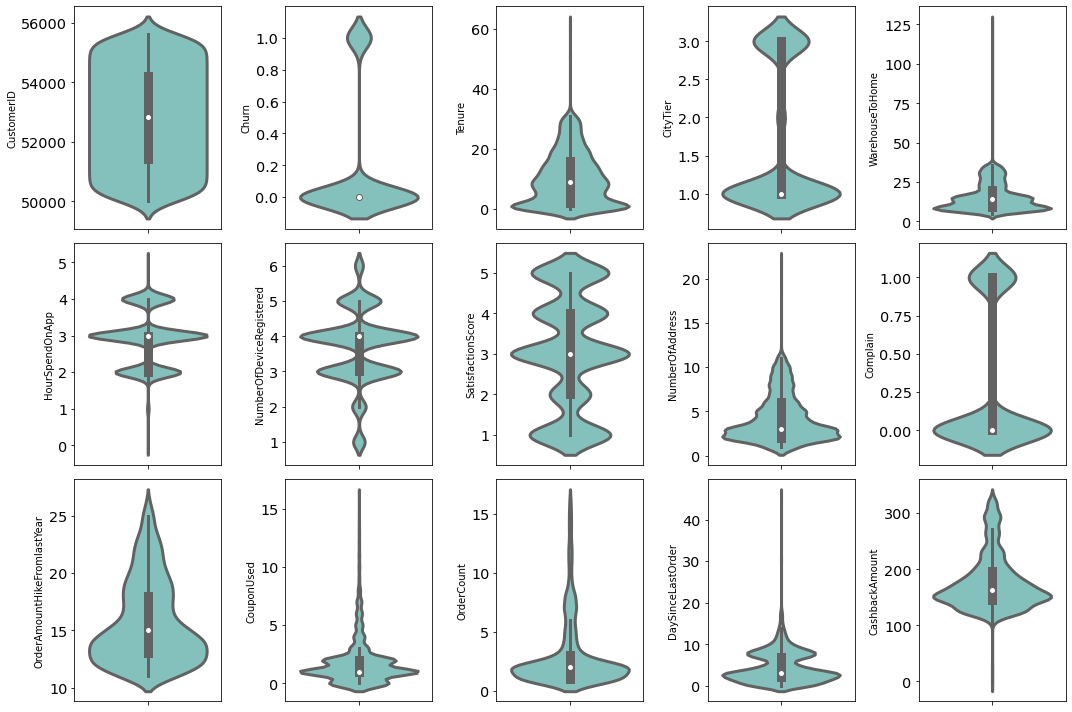

In [21]:
plt.figure(figsize=(15, 10))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y=df[numerical[i]], palette='GnBu')
    plt.tight_layout()

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

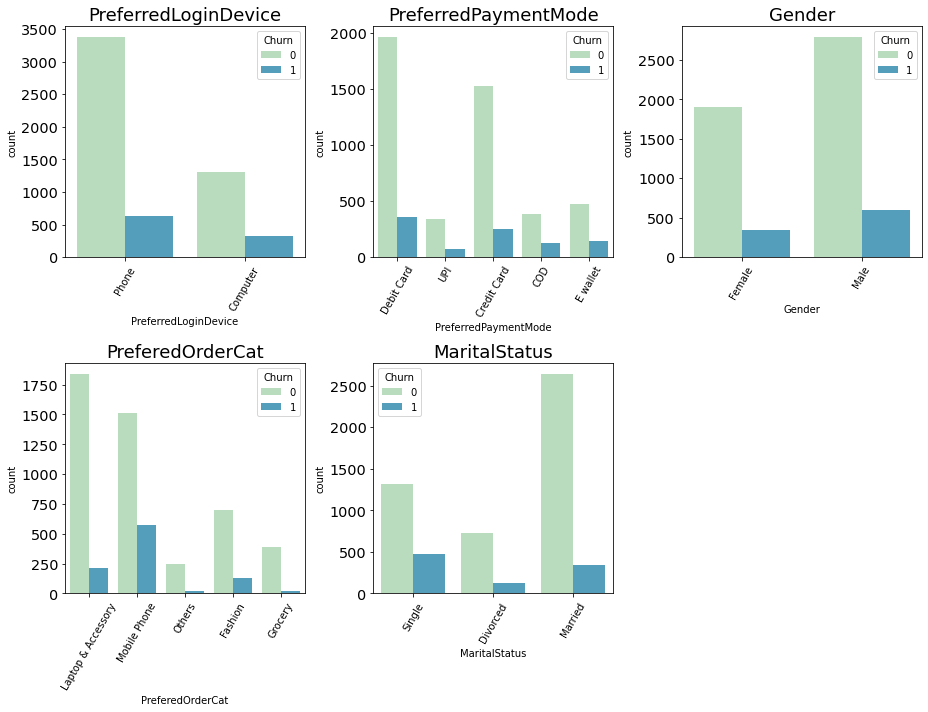

In [22]:
fig = plt.figure(figsize=(13,10))
for i in range(0, len(categorical)):
    plt.subplot(2, 3, i+1)
    plt.xticks(rotation=60, fontsize=10)
    plt.title(categorical[i],fontsize=18)
    sns.countplot(df[categorical[i]], hue=target, palette='GnBu', orient='h')
    plt.tight_layout(pad=8)

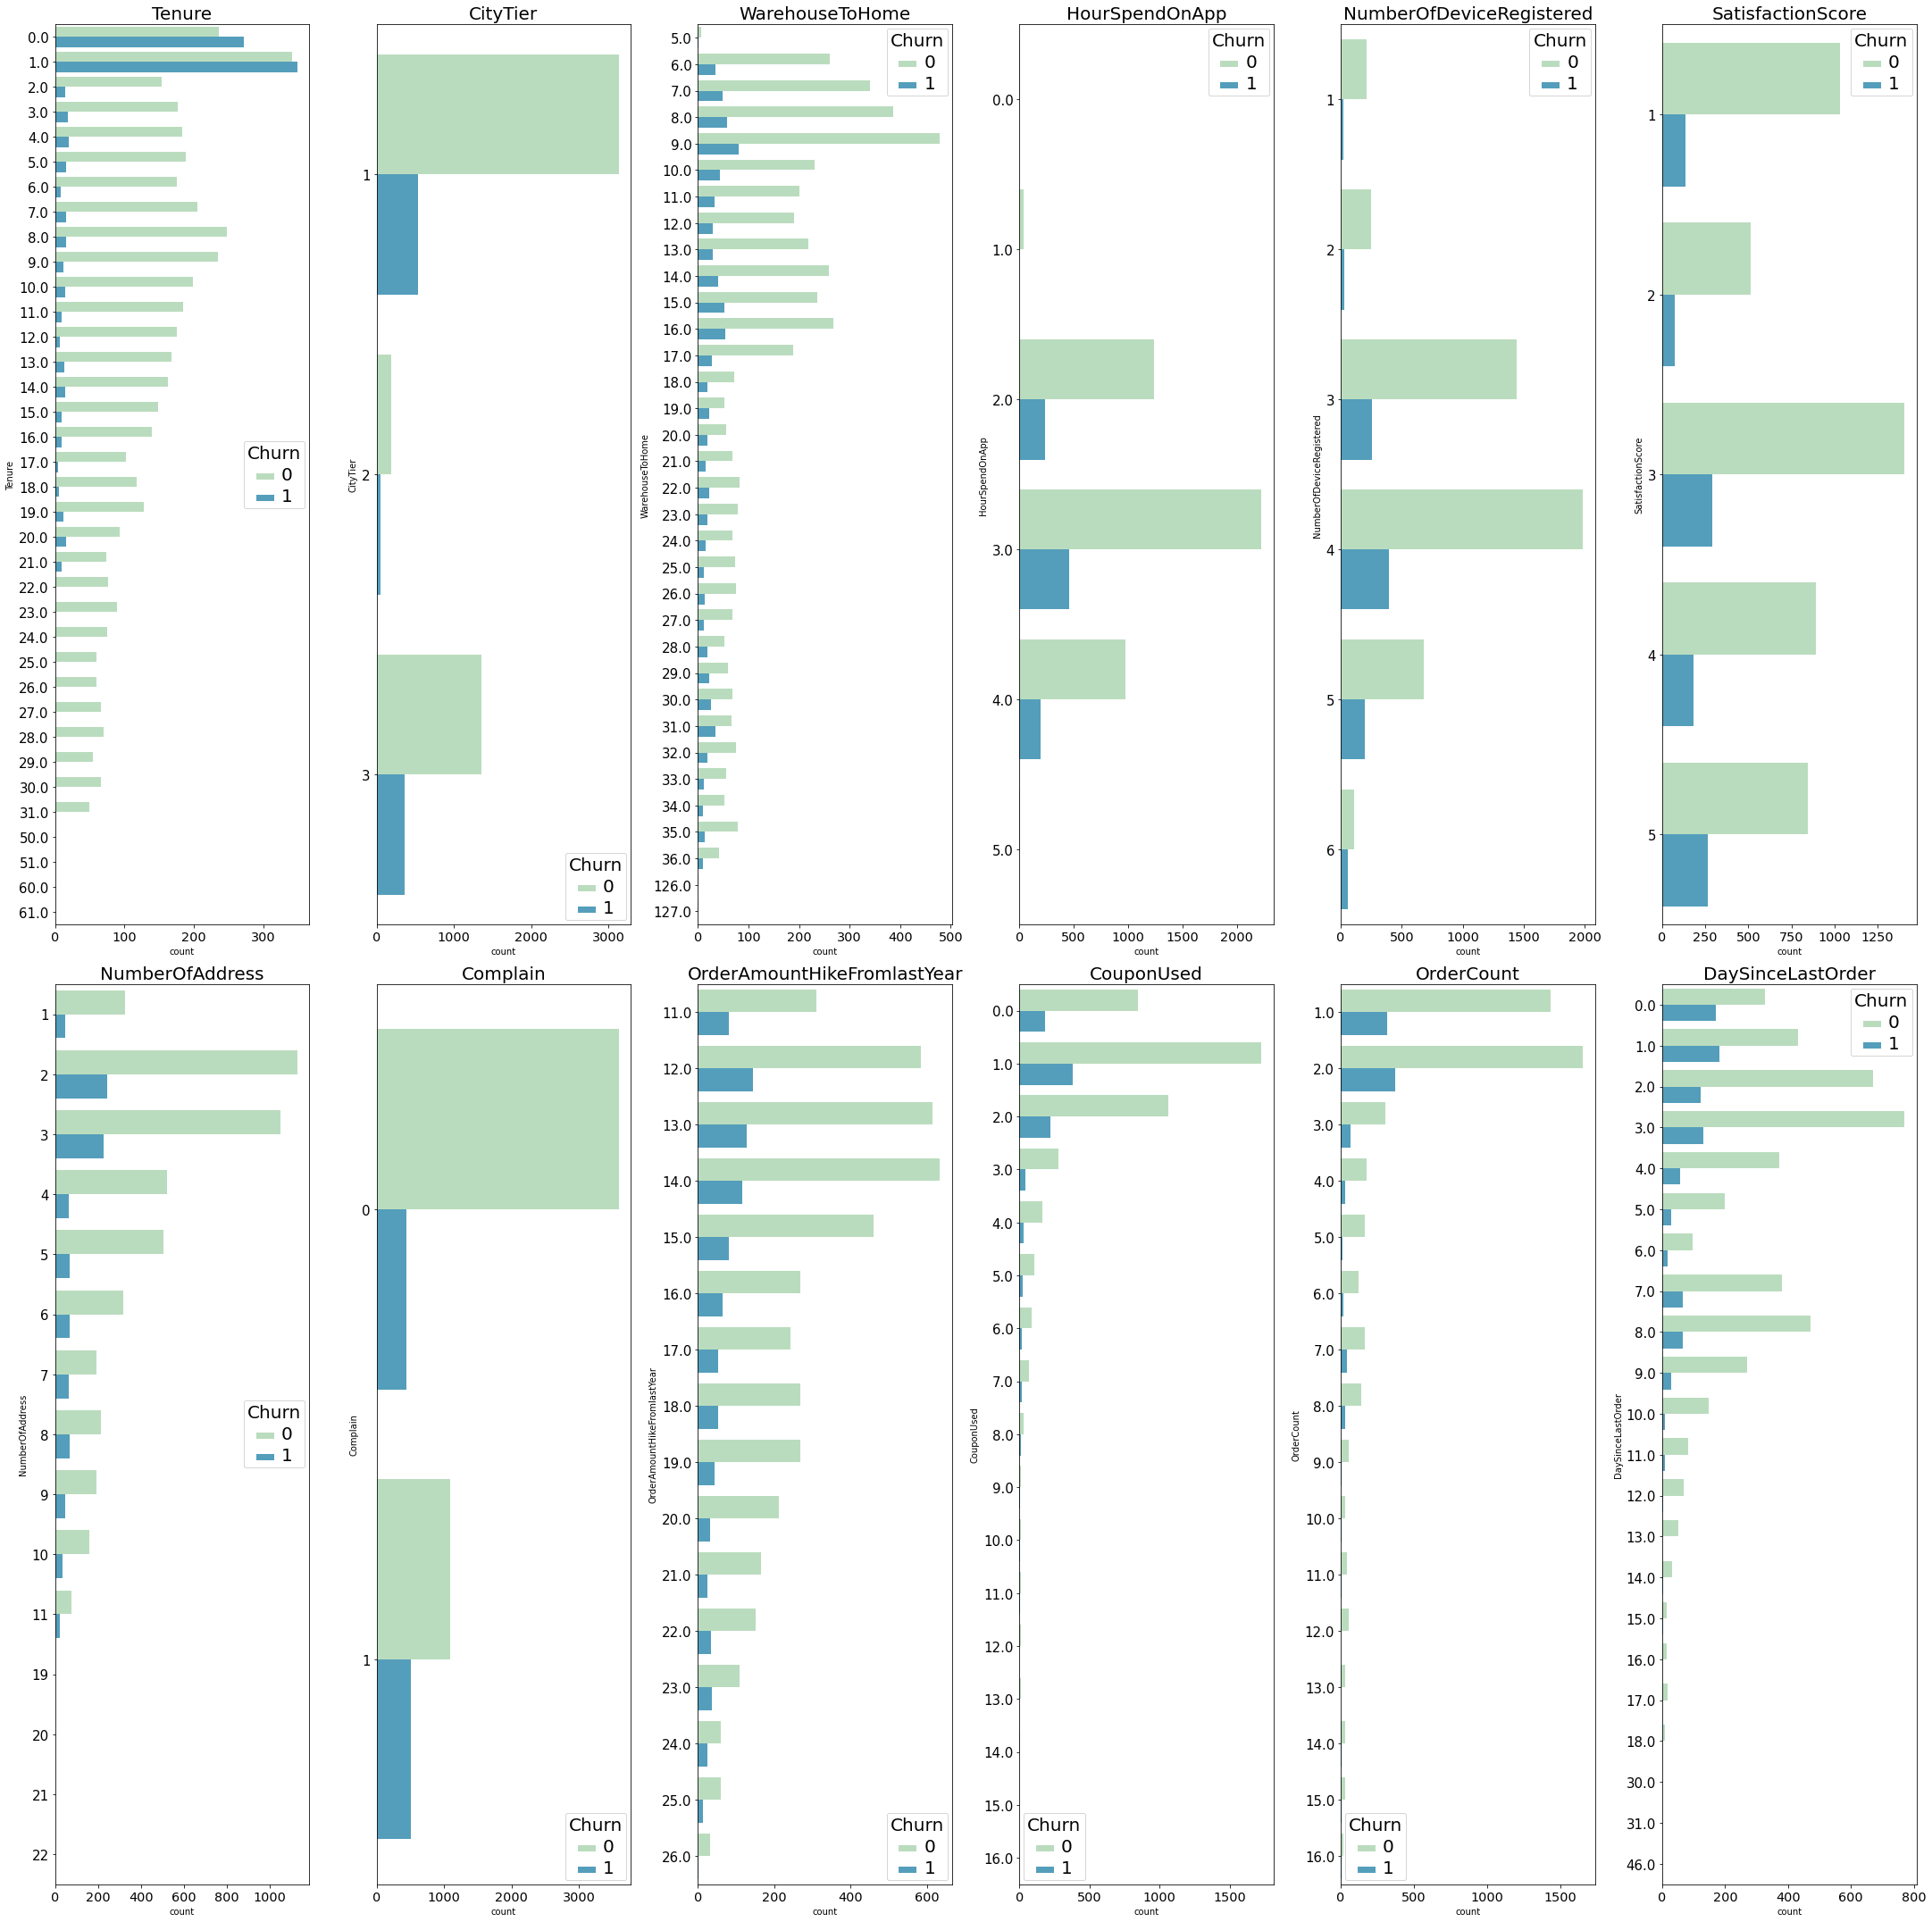

In [23]:
nums0= df[numerical]
#drop karena jumlah unique terlalu banyak
nums1 = nums0.drop(['Churn','CustomerID','CashbackAmount'], axis=1)

# nums1=df[numerical]
fig = plt.figure(figsize=(30,30))
for index, col in enumerate(nums1):
    ax=fig.add_subplot(2, 6, index+1)
    ax.set_title(col,fontsize=20)
    plt.yticks(fontsize=15)
    f= sns.countplot(y=df[col], hue=target, ax=ax, palette="GnBu")
    plt.setp(f.get_legend().get_texts(), fontsize='20')
    plt.setp(f.get_legend().get_title(), fontsize='20')
plt.tight_layout(pad=8);

## Insight Univariate Analysis
1) Boxplot
- WarehouseToHome ada outlier satu yang sangat jauh/ekstrem
- CouponUsed, OrderCount, DaySinceLastOrder, dan CashbackAmount memiliki banyak outlier

2) Kdeplot
- **positive skewed (right)**: Tenure, WarehouseToHome, NumerOfAddress, OrderAmountHikeFromlastYear, CouponUsed, DaySinceLastOrder, OrderCount, CashbackAmount
- **bimodal**: Churn, Complain
- **multimodal**: CityTier, HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore
- **Unimodal/Simetris**: Churn

3) Countplot

(a) Churn pada Data Categorical
- **PreferredLoginDevice** : pelanggan yang churn mayoritas login melalui **phone** 
- **PreferredPaymentMode** : pelanggan yang melakukan churn paling banyak melakukan pembayaran melalui **debit card**
- **Gender** : pelanggan churn paling banyak dilakukan oleh **laki-laki (male)**
- **PreferedOrderCat** : churn paling banyak dilakukan oleh pelanggan yang membeli **mobile phone**
- **MaritalStatus** : mayoritas pelanggan yang churn berstatus **single**

(b) Churn pada Data Numerical
- **Tenure** : pelanggan yang mayoritas churn memiliki tenure selama **1** (kurang tahu satuannya)
- **CityTier** : pelanggan yang churn paling banyak berada kota tingkat **1**
- **WarehouseToHome** : churn banyak dilakukan oleh pelanggan yang jarak rumahnya dengan gudang sekitar **9** (kilometer)
- **HourSpendOnApp** : pelanggan yang paling banyak churn adalah pelanggan yang menghabiskan waktu sekitar **3 jam** pada mobile phone atau website
- **NumberOfDeviceRegistered** : Jumlah device yang paling banyak terdaftar pada pelanggan yang melakukan churn adalah **4**
- **SatisfactionScore** : Skor kepuasan yang paling banyak diberikan oleh pelanggan yang melakukan churn adalah **3**
- **NumberOfAddress** : jumlah alamat yang paling banyak ditambahkan oleh pelanggan yang melakukan churn yaitu **2**
- **Complain** : dalam sebulan terakhir pelanggan yang melakukan churn banyak **melakukan komplain**
- **OrderAmountHikeFromlastYear** : dalam setahun terakhir, pelanggan yang churn mayoritas terdapat peningkatan persentase order sebesar **12%**
- **CouponUsed** : dalam sebulan terakhir, pelanggan yang churn mayoritas menggunakan kupon sebanyak **1**
- **OrderCount** : dalam sebulan terakhir, pelanggan yang churn mayoritas melakukan order sebanyak **2** kali
- **DaySinceLastOrder** : mayoritas rata2 hari customer melakukan churn sejak terakhir order yaitu **0** dan **1** hari

### Rencana Pre-Processing
1. **Handling missing values with imputation (numeric)**: 
- Tenure = 4,9% =========================> median
- WareHouseToHome = 4,7% ================> median
- HourSpendOnApp = 4,7%  ================> if condition
- OrderAmountHikeFromlastYear = 4,9%   ====> median
- CouponUsed = 4,8%  ====================> median
- OrderCount = 4,8%  ====================> median
- DaySinceLastOrder = 5,8%  =============> median


2. **Handling an outliers**
- Using Z score to all positively skewed distribution 


3. **Feature Transformation**
- Using Log Transformation to all positively skewed distribution


4. **Feature Encoding**
- PreferredLoginDevice ====> One Hot Encoding
- PreferredPaymentMode ====> One Hot Encoding
- Gender  =================> One Hot Encoding
- PreferedOrderCat ========> One Hot Encoding
- MaritalStatus ===========> One Hot Encoding


5. **Class Imbalance**
 Apakah frekuensi dari nilai yang paling umum timpang?
- PreferredLoginDevice, top frequency mobile phone = 70,97%    ==========> Undersampling
- PreferredPaymentMode, top frequency Debit Card = 41%        
- Gender, top frequency Gender = 60%                          ============> Undersampling
- PreferedOrderCat, top frequency mobile phone = 36,94 %
- MaritalStatus, top frequency Married = 53,30 %              ============> Undersampling

# Multivariate Analysis

In [24]:
df.drop('CustomerID', axis=1).corr()

Churn    Tenure  CityTier  WarehouseToHome  \
Churn                        1.000000 -0.349408  0.084703         0.076630   
Tenure                      -0.349408  1.000000 -0.060688        -0.018218   
CityTier                     0.084703 -0.060688  1.000000         0.010624   
WarehouseToHome              0.076630 -0.018218  0.010624         1.000000   
HourSpendOnApp               0.018675 -0.021226 -0.009150         0.060990   
NumberOfDeviceRegistered     0.107939 -0.023983  0.027934         0.019071   
SatisfactionScore            0.105481 -0.013903 -0.011554         0.007722   
NumberOfAddress              0.043931  0.237666 -0.029440        -0.011020   
Complain                     0.250188 -0.021268  0.003375         0.028696   
OrderAmountHikeFromlastYear -0.010058  0.005825 -0.031408         0.038795   
CouponUsed                  -0.008264  0.129035  0.021456        -0.003935   
OrderCount                  -0.028697  0.186403  0.033388         0.002681   
DaySinceLastOrder           -0.160757  0.184552  0.017525         0.017829   
CashbackAmount              -0.154118  0.476380  0.055746        -0.009200   

                             HourSpendOnApp  NumberOfDeviceRegistered  \
Churn                              0.018675                  0.107939   
Tenure                            -0.021226                 -0.023983   
CityTier                          -0.009150                  0.027934   
WarehouseToHome                    0.060990                  0.019071   
HourSpendOnApp                     1.000000                  0.316800   
NumberOfDeviceRegistered           0.316800                  1.000000   
SatisfactionScore                  0.031858                 -0.017228   
NumberOfAddress                    0.145126                  0.084997   
Complain                           0.006976                  0.003407   
OrderAmountHikeFromlastYear        0.106843                  0.069475   
CouponUsed                         0.191528                  0.151685   
OrderCount                         0.109575                  0.103464   
DaySinceLastOrder                  0.075716                  0.018208   
CashbackAmount                     0.121490                  0.137183   

                             SatisfactionScore  NumberOfAddress  Complain  \
Churn                                 0.105481         0.043931  0.250188   
Tenure                               -0.013903         0.237666 -0.021268   
CityTier                             -0.011554        -0.029440  0.003375   
WarehouseToHome                       0.007722        -0.011020  0.028696   
HourSpendOnApp                        0.031858         0.145126  0.006976   
NumberOfDeviceRegistered             -0.017228         0.084997  0.003407   
SatisfactionScore                     1.000000         0.053583 -0.031115   
NumberOfAddress                       0.053583         1.000000 -0.026399   
Complain                             -0.031115        -0.026399  1.000000   
OrderAmountHikeFromlastYear          -0.027730         0.015533 -0.004529   
CouponUsed                            0.017936         0.042120 -0.008174   
OrderCount                            0.019764        -0.007609 -0.019307   
DaySinceLastOrder                     0.032082        -0.064847 -0.043546   
CashbackAmount                        0.003473         0.186688  0.000525   

                             OrderAmountHikeFromlastYear  CouponUsed  \
Churn                                          -0.010058   -0.008264   
Tenure                                          0.005825    0.129035   
CityTier                                       -0.031408    0.021456   
WarehouseToHome                                 0.038795   -0.003935   
HourSpendOnApp                                  0.106843    0.191528   
NumberOfDeviceRegistered                        0.069475    0.151685   
SatisfactionScore                              -0.027730    0.017936   
NumberOfAddress                  

<AxesSubplot:>

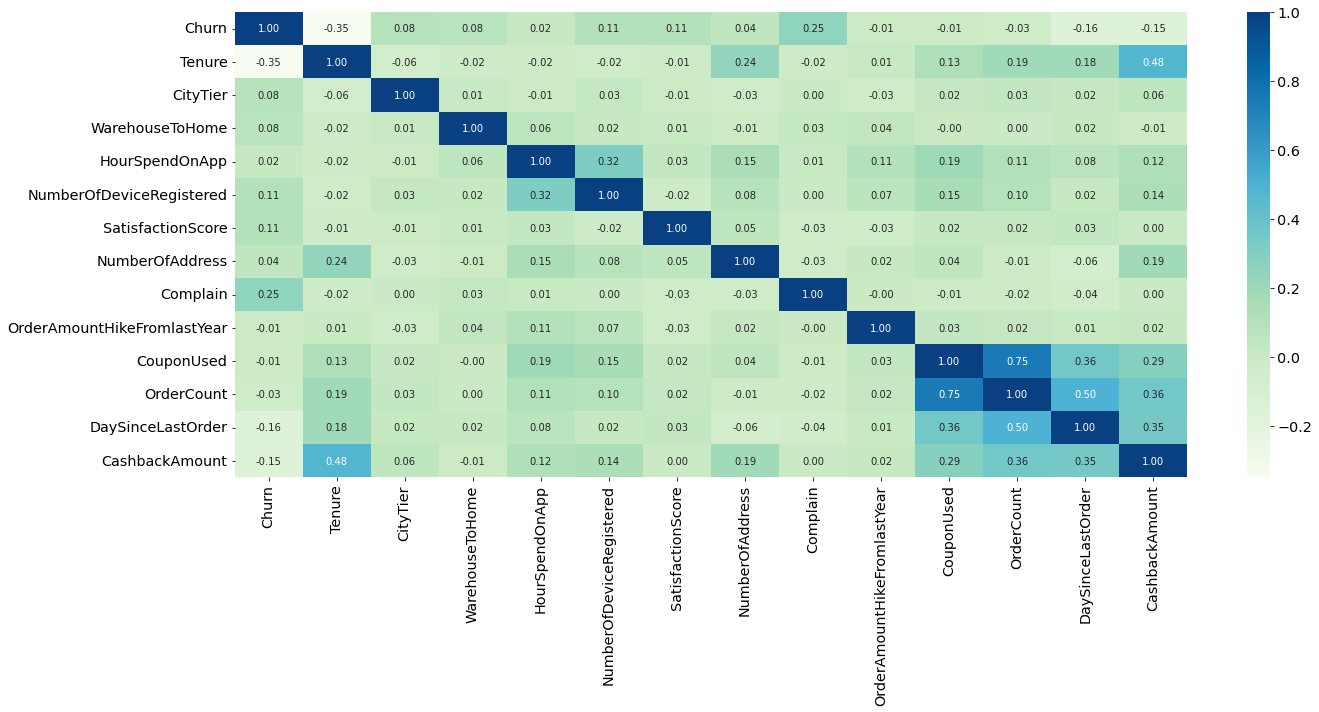

In [25]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.drop('CustomerID', axis=1).corr(), cmap='GnBu', annot=True, fmt='.2f')

<Figure size 1080x1080 with 0 Axes>

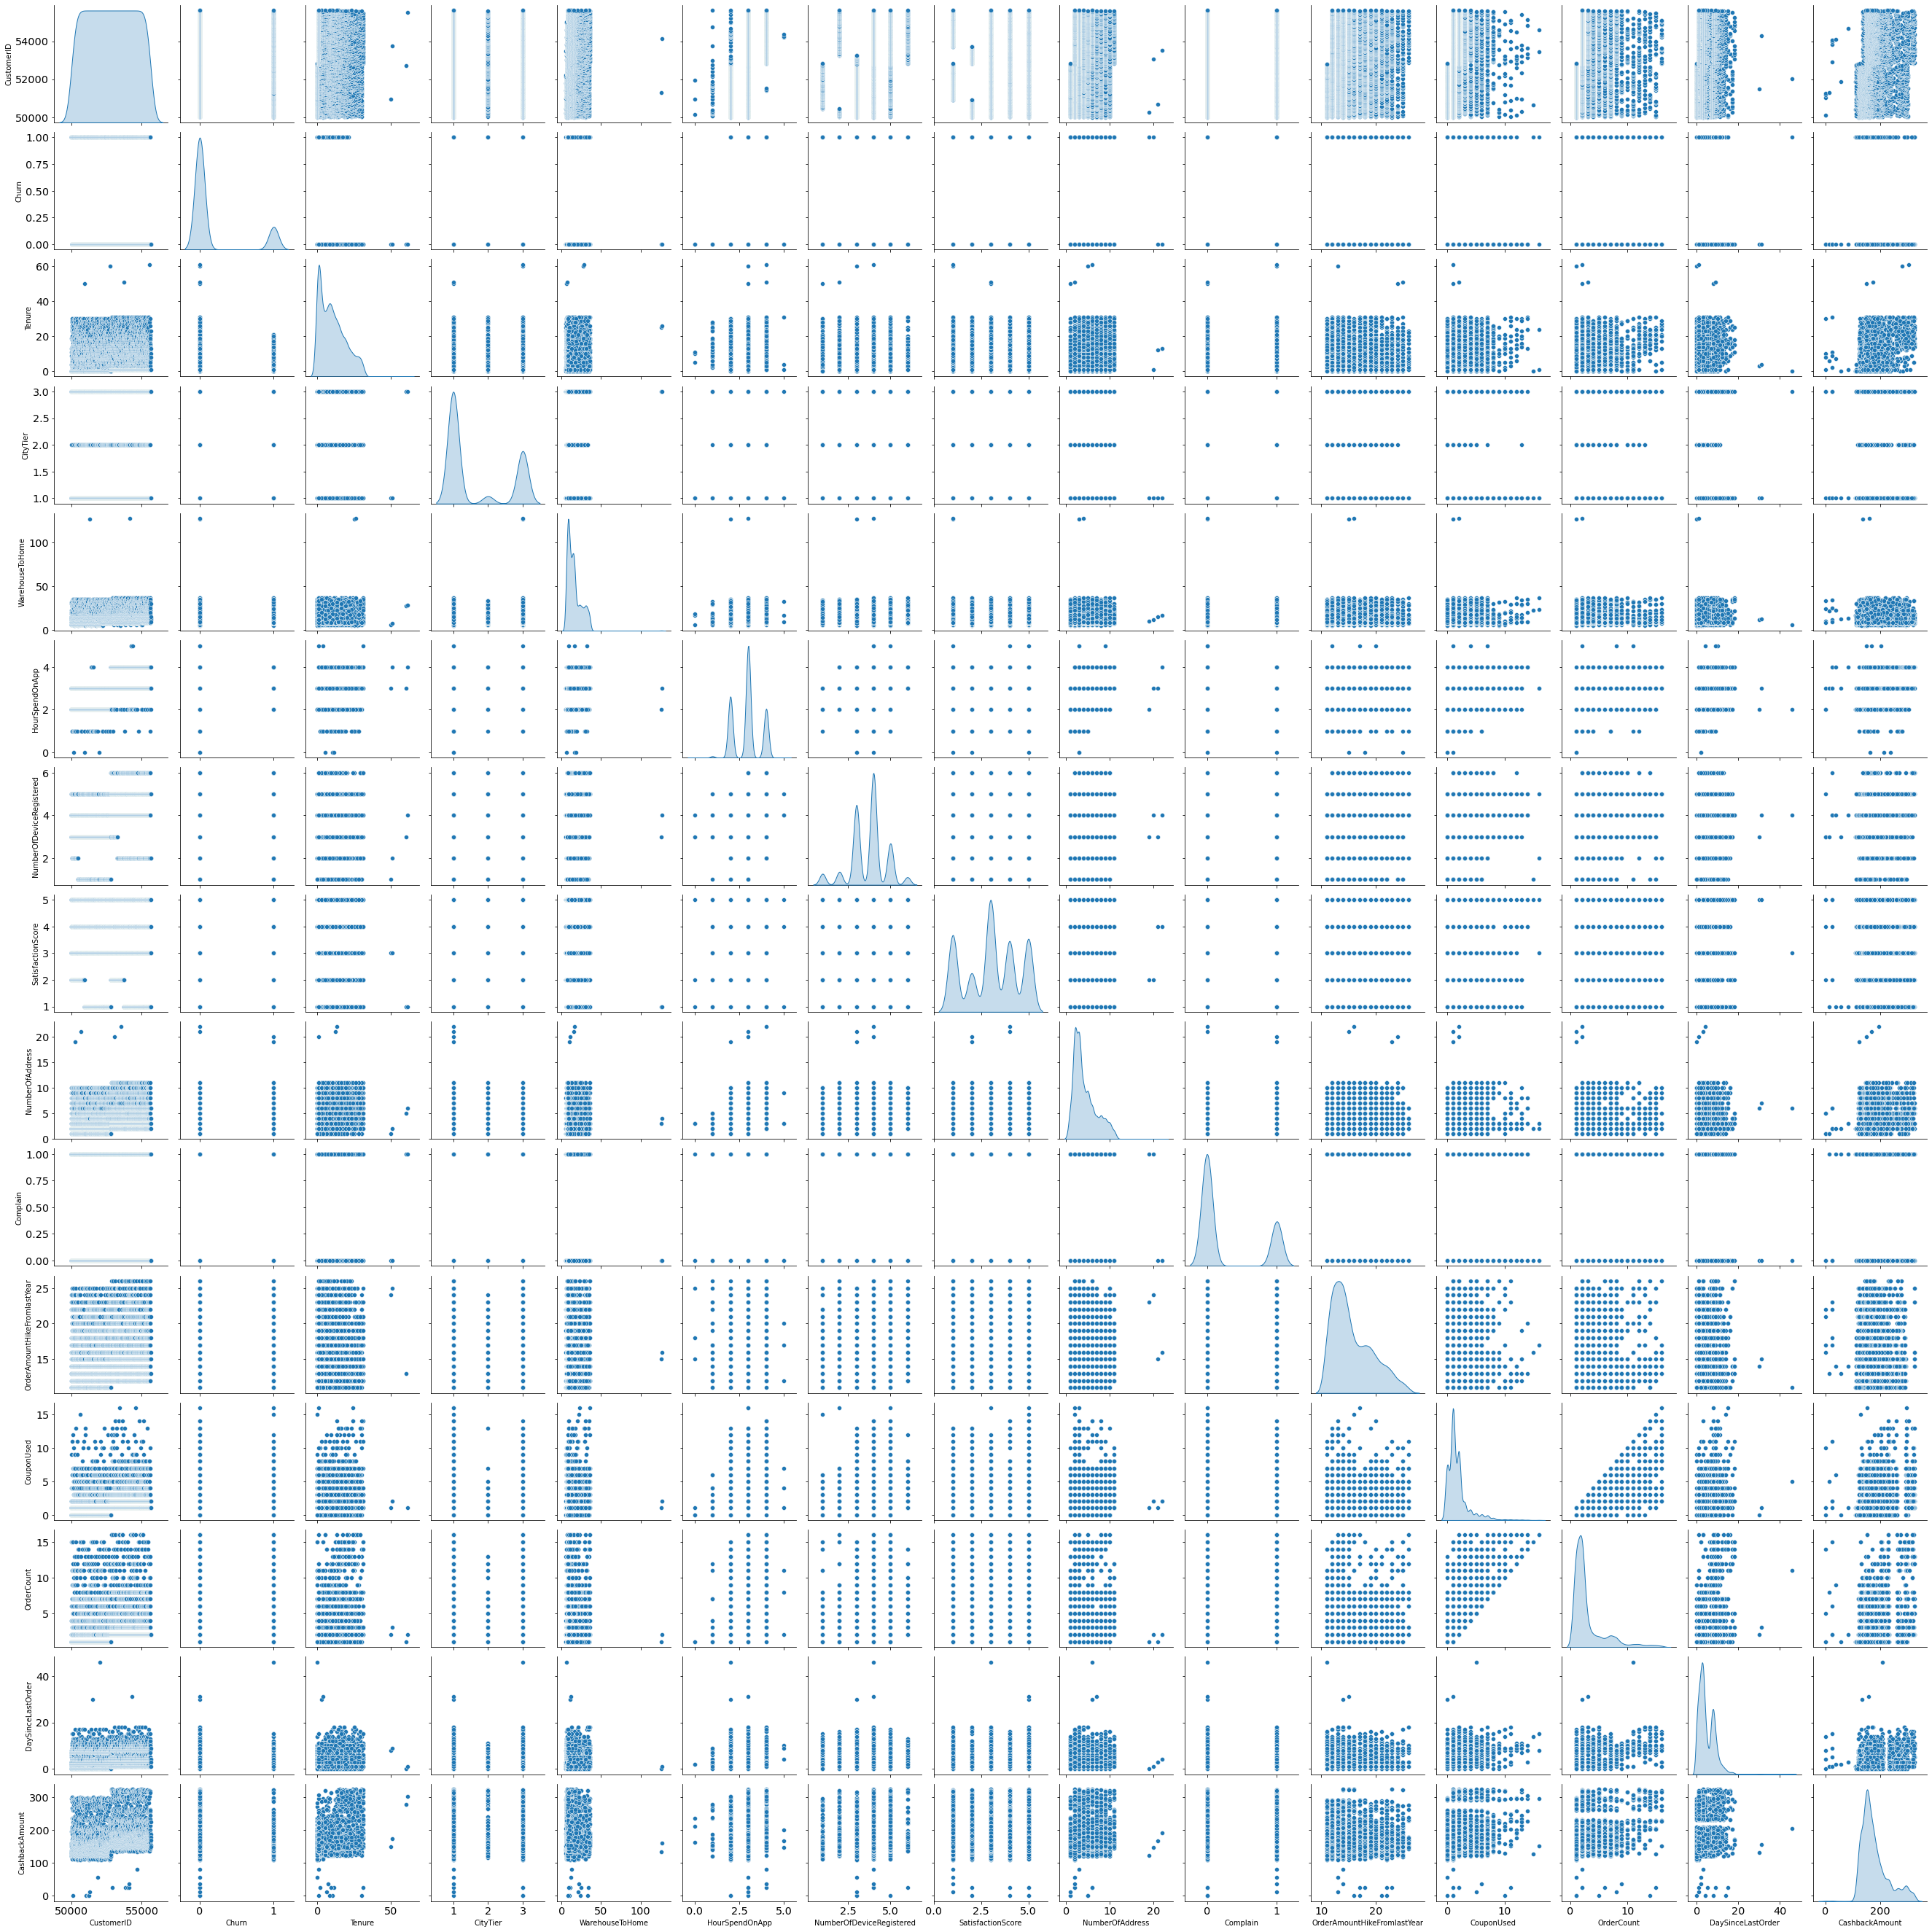

In [26]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', palette='GnBu')

## Insight Multivariate Analysis

1) Pada **Churn** ditemukan korelasi sebagai berikut:

- korelasi **churn** dengan **tenure** sebesar -0,35 yang artinya **semakin tinggi tenure makan kemungkinan pelanggan untuk churn semakin rendah, sebaliknya semakin kecil tenure maka kemungkinan pelanggan churn semakin tinggi**
- korelasi antara **churn** dengan **complain** sebesar 0,25, artinya **semakin banyak pelanggan melakukan komplain maka kemungkinan pelanggan churn juga semakin tinggi**
- hasil korelasi tersebut mendukung data countplot sebelumnya

2) Terdapat korelasi antara **tenure**  dengan **CashbackAmount** yaitu sebesar 0,48 artinya **jika dalam sebulan terakhir pelanggan semakin banyak mendapatkan cashback maka tenure-nya akan semakin tinggi**

# BUSINESS INSIGHT

1) **Churn, Tenure, dan CashbackAmount**

In [27]:
def show_values(axis, orientation="vertical", space=.01):
    def show(ax):
        if orientation == "vertical":
            for p in ax.patches:
                x = p.get_x() + p.get_width() / 2
                y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(x, y, value, ha="center") 
        elif orientation == "horizontal":
            for p in ax.patches:
                x = p.get_x() + p.get_width() + float(space)
                y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(x, y, value, ha="left")

    if isinstance(axis, np.ndarray):
        for idx, ax in np.ndenumerate(axis):
            show(axis)
    else:
        show(axis)

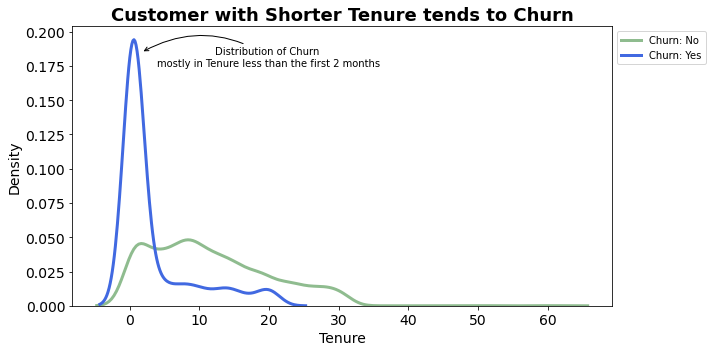

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'darkseagreen', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'royalblue', label= 'Churn: Yes', ax=ax)

ax.set_title('Customer with Shorter Tenure tends to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Tenure', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


ax.annotate('Distribution of Churn \nmostly in Tenure less than the first 2 months', 
            xy=(1.75, 0.185), xytext=(20, 0.175), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


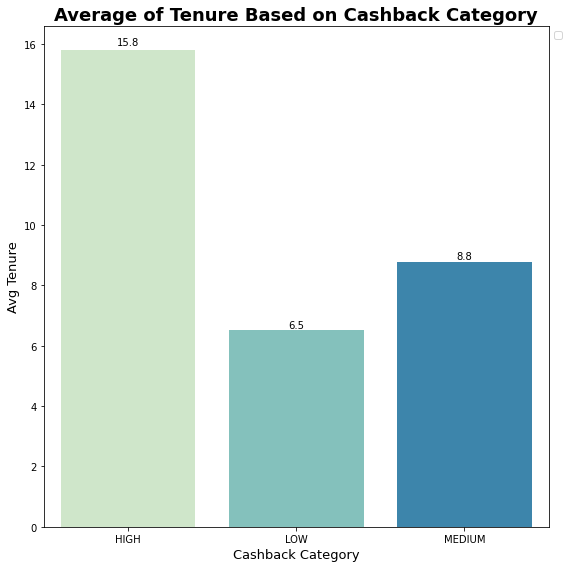

In [29]:
#melakukan kategorisasi cashback amount
df0=df['CashbackAmount'].reset_index()
Q1 = df0['CashbackAmount'].quantile(0.25)
Q3 = df0['CashbackAmount'].quantile(0.75)

df0['CashCat']=np.where(df0['CashbackAmount']<Q1,'LOW',
                        np.where(df0['CashbackAmount'] <= Q3, 'MEDIUM', 'HIGH'))

#join kolom
df1 = df[['CustomerID','Churn','Tenure','CashbackAmount']]
df2 = df1.join(df0.set_index('CashbackAmount'), on='CashbackAmount').reset_index()
df3 = df2.groupby(['CashCat']).agg({'Tenure':'mean','CustomerID':'nunique'}).reset_index()
df3.columns= ['CashCat','AvgTenure','TotalCust']
df3

#visualisasi
plt.figure(figsize=(8,8))
ax = sns.barplot(data=df3, x='CashCat', y='AvgTenure', palette='GnBu')
plt.title('Average of Tenure Based on Cashback Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Cashback Category',fontsize=13);
plt.ylabel('Avg Tenure',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

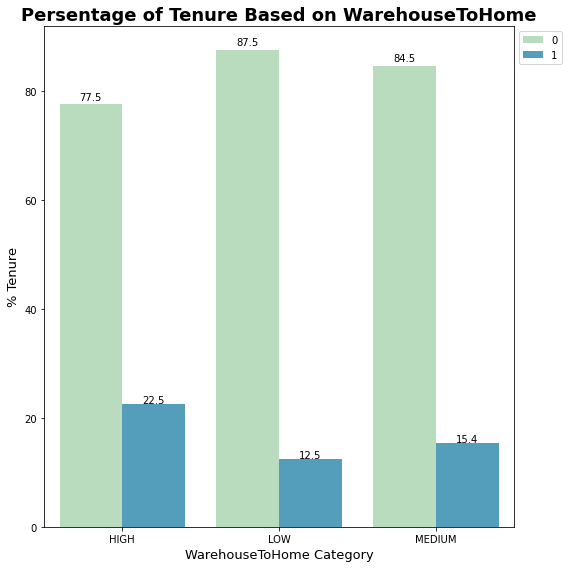

In [30]:
#melakukan kategorisasi cashback amount
dfz=df['WarehouseToHome'].reset_index()
Q1 = dfz['WarehouseToHome'].quantile(0.25)
Q3 = dfz['WarehouseToHome'].quantile(0.75)

dfz['WTHCat']=np.where(dfz['WarehouseToHome']<Q1,'LOW',
                        np.where(dfz['WarehouseToHome'] <= Q3, 'MEDIUM', 'HIGH'))

#join kolom
df1 = df[['CustomerID','Churn','Tenure','WarehouseToHome']]
df2 = df1.join(dfz.set_index('WarehouseToHome'), on='WarehouseToHome').reset_index()
# df3 = df2.groupby(['Churn','CashCat']).agg({'Tenure':'mean','CustomerID':'nunique'}).reset_index()
# df3.columns= ['Churn','CashCat','AvgTenure','TotalCust']
# df3

dfcategory=df2.groupby(['WTHCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()

dfcategory1 = df2.groupby(['WTHCat']).agg({'CustomerID':'nunique'}).reset_index()
dfcategory2 = dfcategory.merge(dfcategory1, how='left',
              on='WTHCat')

dfcategory2.columns = ['WTHCat','Churn','Num_Customer','AllCustomer']
dfcategory2['Ratio'] = (dfcategory2['Num_Customer'] / dfcategory2['AllCustomer'] * 100.0).round(2)

#visualisasi
plt.figure(figsize=(8,8))
ax = sns.barplot(data=dfcategory2, x='WTHCat', y='Ratio', palette='GnBu',hue='Churn')
plt.title('Persentage of Tenure Based on WarehouseToHome', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('WarehouseToHome Category',fontsize=13);
plt.ylabel('% Tenure',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

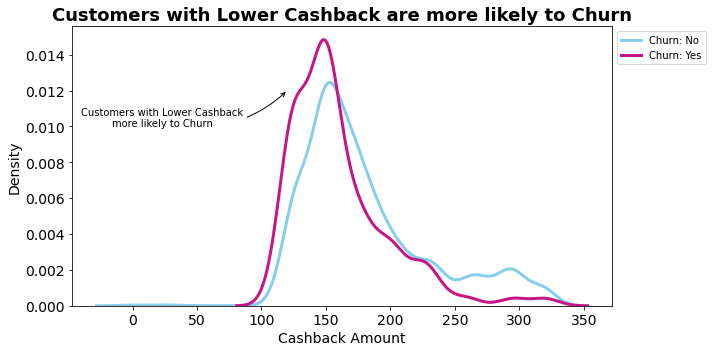

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['CashbackAmount'].dropna(), color= 'skyblue', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['CashbackAmount'].dropna(), color= 'mediumvioletred', label= 'Churn: Yes', ax=ax)

ax.set_title('Customers with Lower Cashback are more likely to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Cashback Amount', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


ax.annotate('Customers with Lower Cashback\nmore likely to Churn', 
            xy=(120, 0.012), xytext=(23, 0.01), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center');

**Insight**:
Pelanggan dengan tenure rendah cenderung mendapatkan cashback yang tergolong sedikit dan memiliki potensi untuk melakukan churn

**Business Recommendation**: Memberikan promo kepada pelanggan berupa kupon atau cashback agar pelanggan terus bertahan atau memperpanjang tenure dan kembali berbelanja di e-commerce.

- **Churn, Complain, dan PreferredOrderCat**

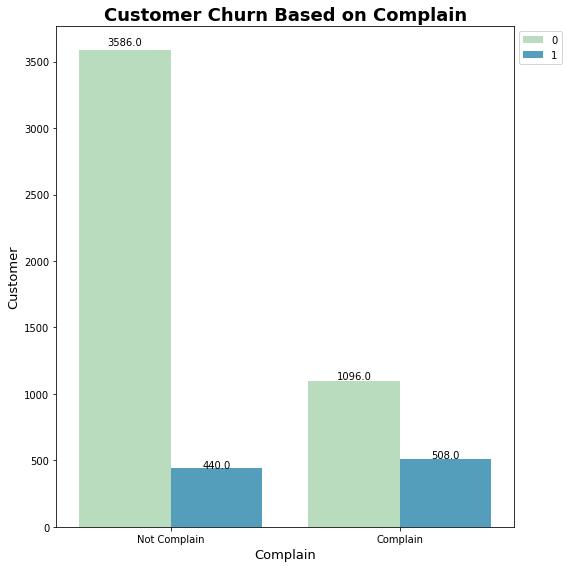

In [32]:
dfchurncomplain = df.groupby(['Churn','Complain']).agg({'CustomerID':'nunique'}).reset_index()
dfchurncomplain['Complain'] = dfchurncomplain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})
#visualisasi
plt.figure(figsize=(8,8))
ax = sns.barplot(data=dfchurncomplain, x='Complain', y='CustomerID', hue='Churn', palette='GnBu')
plt.title('Customer Churn Based on Complain', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Complain',fontsize=13);
plt.ylabel('Customer',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

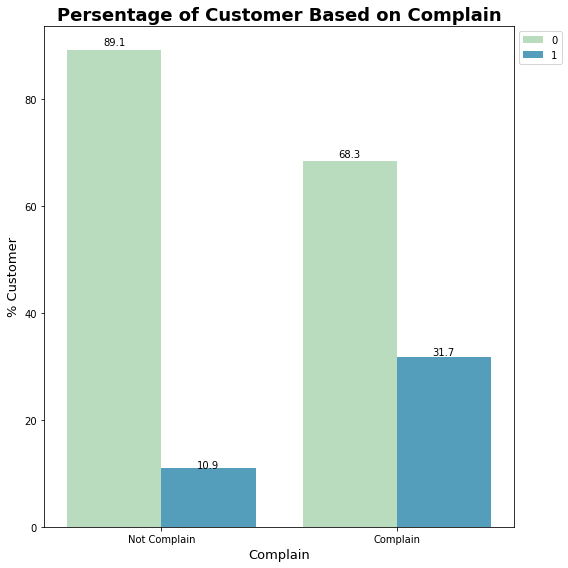

In [33]:
df1 = df[['CustomerID','Churn','Complain']]

dfcategory=df1.groupby(['Complain','Churn']).agg({'CustomerID':'nunique'}).reset_index()

dfcategory1 = df1.groupby(['Complain']).agg({'CustomerID':'nunique'}).reset_index()
dfcategory2 = dfcategory.merge(dfcategory1, how='left',
              on='Complain')

dfcategory2.columns = ['Complain','Churn','Num_Customer','AllCustomer']
dfcategory2['Ratio'] = (dfcategory2['Num_Customer'] / dfcategory2['AllCustomer'] * 100.0).round(2)
dfcategory2['Complain'] = dfcategory2['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})
#visualisasi
plt.figure(figsize=(8,8))
ax = sns.barplot(data=dfcategory2, x='Complain', y='Ratio', palette='GnBu',hue='Churn')
plt.title('Persentage of Customer Based on Complain', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Complain',fontsize=13);
plt.ylabel('% Customer',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

In [34]:
dfcategory0=df.groupby(['PreferedOrderCat','Churn', 'Complain',]).agg({'CustomerID':'count'}).reset_index()
dfcategory0['Complain'] = dfcategory0['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

dfcategory0

PreferedOrderCat  Churn      Complain  CustomerID
0              Fashion      0  Not Complain         508
1              Fashion      0      Complain         190
2              Fashion      1  Not Complain          76
3              Fashion      1      Complain          52
4              Grocery      0  Not Complain         276
5              Grocery      0      Complain         114
6              Grocery      1  Not Complain           8
7              Grocery      1      Complain          12
8   Laptop & Accessory      0  Not Complain        1386
9   Laptop & Accessory      0      Complain         454
10  Laptop & Accessory      1  Not Complain         106
11  Laptop & Accessory      1      Complain         104
12        Mobile Phone      0  Not Complain        1228
13        Mobile Phone      0      Complain         282
14        Mobile Phone      1  Not Complain         242
15        Mobile Phone      1      Complain         328
16              Others      0  Not Complain         188
17              Others      0      Complain          56
18              Others      1  Not Complain           8
19              Others      1      Complain          12

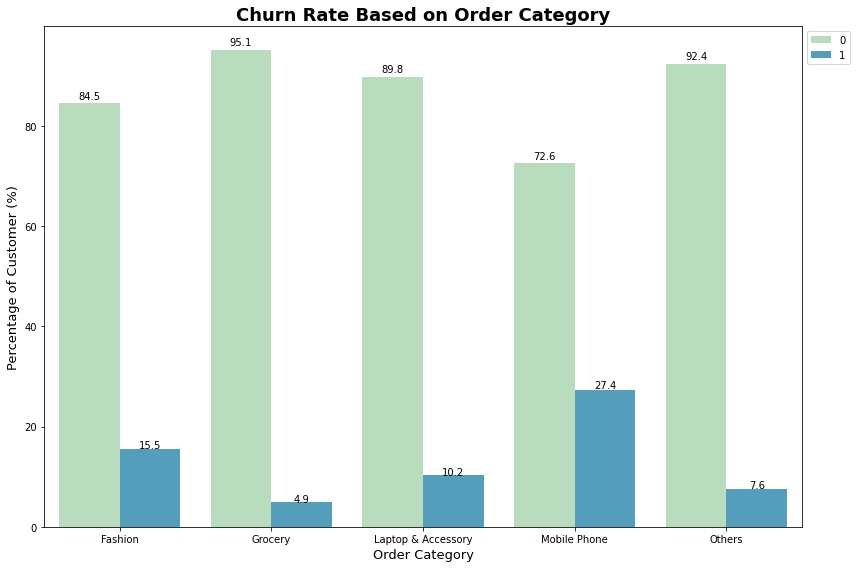

In [35]:
dfcategory=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()

dfcategory1 = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
dfcategory2 = dfcategory.merge(dfcategory1, how='left',
              on='PreferedOrderCat')

dfcategory2.columns = ['PreferedOrderCat','Churn','Num_Customer','AllCustomer']
dfcategory2['Ratio'] = (dfcategory2['Num_Customer'] / dfcategory2['AllCustomer'] * 100.0).round(2)

#visualisasi
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dfcategory2, x='PreferedOrderCat', y='Ratio', hue='Churn', palette='GnBu')
plt.title('Churn Rate Based on Order Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

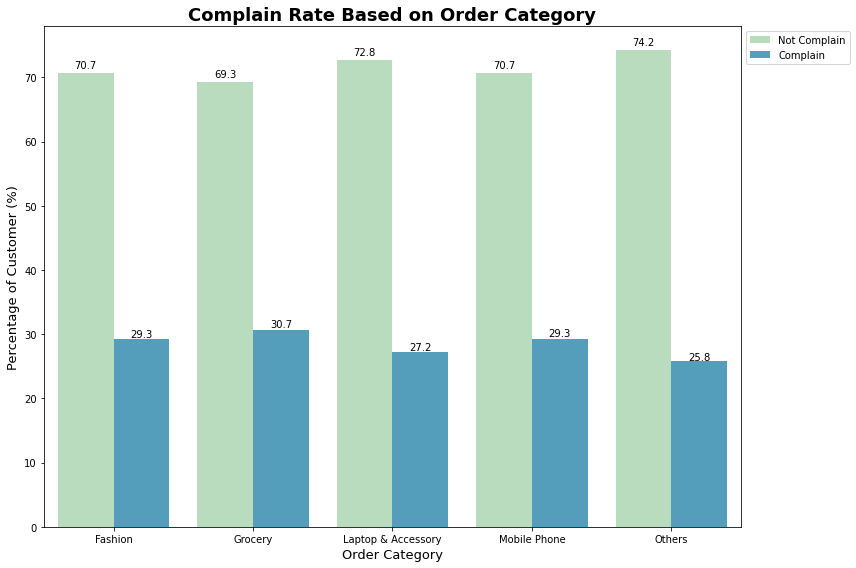

In [36]:
dfcomplain = df.groupby(['PreferedOrderCat','Complain']).agg({'CustomerID':'nunique'}).reset_index()
dfcomplain['Complain'] = dfcomplain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

dfcomplain2 = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
dfcomplain3 = dfcomplain.merge(dfcomplain2, how='left',
              on='PreferedOrderCat')

dfcomplain3.columns = ['PreferedOrderCat','Complain','Num_Customer','AllCustomer']
dfcomplain3['Ratio'] = (dfcomplain3['Num_Customer'] / dfcomplain3['AllCustomer'] * 100.0).round(2)

#visualisasi
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dfcomplain3, x='PreferedOrderCat', y='Ratio', hue='Complain', palette='GnBu')
plt.title('Complain Rate Based on Order Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

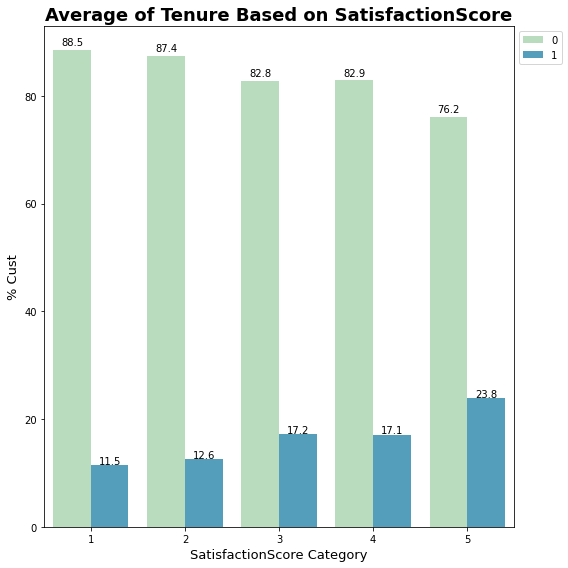

In [38]:
df1 = df[['CustomerID','Churn','Tenure','SatisfactionScore']]

dfcategory=df1.groupby(['SatisfactionScore','Churn']).agg({'CustomerID':'nunique'}).reset_index()

dfcategory1 = df1.groupby(['SatisfactionScore']).agg({'CustomerID':'nunique'}).reset_index()
dfcategory2 = dfcategory.merge(dfcategory1, how='left',
              on='SatisfactionScore')

dfcategory2.columns = ['SatisfactionScore','Churn','Num_Customer','AllCustomer']
dfcategory2['Ratio'] = (dfcategory2['Num_Customer'] / dfcategory2['AllCustomer'] * 100.0).round(2)

#visualisasi
plt.figure(figsize=(8,8))
ax = sns.barplot(data=dfcategory2, x='SatisfactionScore', y='Ratio', palette='GnBu',hue='Churn')
plt.title('Average of Tenure Based on SatisfactionScore', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('SatisfactionScore Category',fontsize=13);
plt.ylabel('% Cust',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

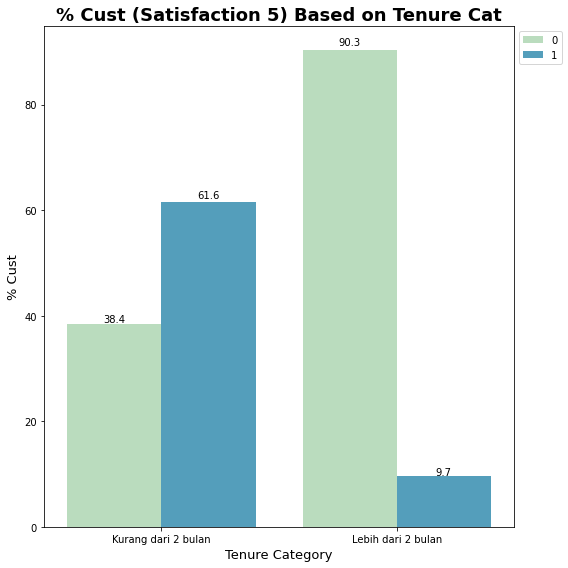

In [39]:
dfz=df['SatisfactionScore'][df['SatisfactionScore']==5].reset_index()
Q1 = 2
Q3 = 2

df1 = df[['CustomerID','Churn','Tenure','SatisfactionScore']][df['SatisfactionScore']==5]

q=[]
for i, kol in df1.iterrows():
    if kol['Tenure'] < 2:
        q.append('Kurang dari 2 bulan')
    else:
        q.append('Lebih dari 2 bulan')
df1['CashCat']=q
# df1['CashCat']=np.where(df1['Tenure']<2,'Kurang dari 2 bulan',
#                         np.where(df1['Tenure'] >= 2, 'Lebih dari 2 bulan','q'))

dfcategory=df1.groupby(['CashCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()

dfcategory1 = df1.groupby(['CashCat']).agg({'CustomerID':'nunique'}).reset_index()
dfcategory2 = dfcategory.merge(dfcategory1, how='left',
              on='CashCat')

dfcategory2.columns = ['CashCat','Churn','Num_Customer','AllCustomer']
dfcategory2['Ratio'] = (dfcategory2['Num_Customer'] / dfcategory2['AllCustomer'] * 100.0).round(2)

#visualisasi
plt.figure(figsize=(8,8))
ax = sns.barplot(data=dfcategory2, x='CashCat', y='Ratio', palette='GnBu',hue='Churn')
plt.title('% Cust (Satisfaction 5) Based on Tenure Cat', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Tenure Category',fontsize=13);
plt.ylabel('% Cust',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

**Insight**: 
- Pelanggan yang melakukan churn karena komplain lebih tinggi dibanding yang tidak komplain dan mayoritas membeli mobile phone
- Komplain paling banyak dilakukan oleh pelanggan membeli grocery atau kebutuhan sehari-hari, lalu disusul mobile phone dan fashion

**Business Recommendation**:
- Bagi pelanggan yang baru saja membeli barang elektronik, cross-selling dapat dilakukan dengan menawarkan aksesoris elektronik, seperti keyboard, mouse, dll
- Untuk grocery, menawarkan service pengiriman cepat untuk menjaga kualitas produk
- Untuk fashion dan mobile phone, menawarkan tampilan foto produk yang original atau asli dan deskripsi produk yang jelas

# Pre-Processing
1. **Handling missing values with imputation (numeric)**: 
- Tenure = 4,9% =========================> median
- WareHouseToHome = 4,7% ================> median
- HourSpendOnApp = 4,7%  ================> mean
- OrderAmountHikeFromlastYear = 4,9%   ====> median
- CouponUsed = 4,8%  ====================> median
- OrderCount = 4,8%  ====================> median
- DaySinceLastOrder = 5,8%  =============> median


2. **Handling an outliers**
- Using Z score to all positively skewed distribution 


3. **Feature Transformation**
- Using Log Transformation to all positively skewed distribution


4. **Feature Encoding**
- PreferredLoginDevice ====> One Hot Encoding
- PreferredPaymentMode ====> One Hot Encoding
- Gender  =================> One Hot Encoding
- PreferedOrderCat ========> One Hot Encoding
- MaritalStatus ===========> One Hot Encoding


5. **Class Imbalance** 
<br> Apakah frekuensi masing-masing nilai pada target timpang?
<br> 0 : 4882
<br> 1 : 948
<br> Persentase ketimpangan 16.838 %
<br> Berdasarakan https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data ada tiga tingkat ketimpangan yaitu mild, moderate dan extreme. Data ini tergolong pada tingkat ketimpangan moderate.

# 1. **Handling missing values with imputation (numeric)**:

- Tenure = 4,9% =========================> median
- WareHouseToHome = 4,7% ================> median
- HourSpendOnApp = 4,7%  ================> mean
- OrderAmountHikeFromlastYear = 4,9%   ====> median
- CouponUsed = 4,8%  ====================> median
- OrderCount = 4,8%  ====================> median
- DaySinceLastOrder = 5,8%  =============> median

In [42]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## 1.1. Tenure

In [43]:
df = df.sort_values(['CashbackAmount','NumberOfAddress','OrderCount','DaySinceLastOrder','CouponUsed'])
dp = df.copy()
dp = dp.sort_values(['CashbackAmount','NumberOfAddress'])
dp['Tenure'].fillna(method='ffill', inplace=True)
dp.head(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1026       51027      0     1.0                Phone         1   
1255       51256      0     8.0                Phone         3   
101        50102      0    10.0             Computer         3   
1176       51177      0    30.0             Computer         3   
1300       51301      0     6.0                Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1026             33.0          Credit Card  Female             2.0   
1255             24.0          Credit Card    Male             3.0   
101              10.0             E wallet    Male             2.0   
1176              8.0          Credit Card    Male             2.0   
1300             21.0          Credit Card  Female             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
1026                         5  Laptop & Accessory                  5   
1255                         3  Laptop & Accessory                  5   
101                          3        Mobile Phone                  2   
1176                         3             Grocery                  4   
1300                         3  Laptop & Accessory                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
1026       Married                1         0                         21.0   
1255       Married                1         0                         16.0   
101        Married                5         0                         17.0   
1176       Married                5         0                         22.0   
1300       Married                1         1                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
1026         1.0         1.0                0.0             0.0  
1255         0.0         1.0                4.0             0.0  
101          1.0         5.0                8.0             0.0  
1176        10.0        14.0               14.0             0.0  
1300         5.0         8.0                1.0            12.0

## 1.2. WareHouseToHome

In [44]:
dp['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)

## 1.3. HourSpendOnApp

In [45]:
gender = df['Gender'].value_counts().index
maritalstatus = df['MaritalStatus'].value_counts().index
PreferredLoginDevice = df['PreferredLoginDevice'].value_counts().index
x = []
nan = np.nan
for index, kolom in df.iterrows():
    if kolom['HourSpendOnApp'] > 0:
        b = kolom['HourSpendOnApp']
        x.append(b)
    else:
        for i in gender:
            for j in maritalstatus:
                for k in PreferredLoginDevice:
                    if (kolom['Gender'] == i) & (kolom['MaritalStatus'] == j) & (kolom['PreferredLoginDevice'] == k):
                        b = df['HourSpendOnApp'][(df['Gender'] == i) & (df['MaritalStatus'] == j) & (df['PreferredLoginDevice'] == k)].median()
                        x.append(b)
dp['HourSpendOnApp'] = x

## 1.4. OrderAmountHikeFromlastYear

In [46]:
dp['OrderAmountHikeFromlastYear'].fillna(dp['OrderAmountHikeFromlastYear'].median(), inplace=True)

## 1.5. CouponUsed

In [47]:
b = []
for index, kolom in dp.iterrows():
    if kolom['CouponUsed'] >= 0:
        a=kolom['CouponUsed']
        b.append(a)
    else:
        a=kolom['OrderCount']
        b.append(a)


dp['CouponUsed']=b

## 1.6. OrderCount

In [48]:
dp = dp.sort_values(['CouponUsed','DaySinceLastOrder','CashbackAmount','OrderCount'])
dp['OrderCount'].fillna(method='ffill',inplace=True)
# pd.options.display.min_rows = 5630
# pd.options.display.max_rows = 5630
# dp.head(5630) 

## 1.7. DaySinceLastOrder

In [49]:
dp = dp.sort_values(['OrderCount','CouponUsed','CashbackAmount','Tenure']) #GASS
dp['DaySinceLastOrder'].fillna(method='ffill',inplace=True)

In [50]:
dp.sort_values('WarehouseToHome').tail(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
5484       55485      0     3.0                Phone         1   
5233       55234      0     2.0                Phone         1   
2894       52895      1     2.0                Phone         1   
1309       51310      0    25.0             Computer         3   
4124       54125      0    26.0             Computer         3   

      WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  \
5484             36.0           Debit Card   Male             4.0   
5233             36.0           Debit Card   Male             4.0   
2894             36.0          Credit Card   Male             4.0   
1309            126.0           Debit Card   Male             2.0   
4124            127.0           Debit Card   Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
5484                         6  Laptop & Accessory                  3   
5233                         6  Laptop & Accessory                  4   
2894                         4  Laptop & Accessory                  5   
1309                         3        Mobile Phone                  1   
4124                         4        Mobile Phone                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
5484       Married               10         0                         18.0   
5233       Married                3         0                         15.0   
2894      Divorced                9         1                         20.0   
1309       Married                3         0                         15.0   
4124       Married                4         0                         16.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
5484         1.0         2.0                7.0          188.84  
5233         1.0         2.0                8.0          190.49  
2894         1.0         2.0                1.0          191.73  
1309         1.0         1.0                0.0          134.82  
4124         2.0         2.0                1.0          159.82

In [51]:
#karena data sudah terisi semua maka beberapa tipe data baru dapat diubah
dp = dp.astype({"Tenure":'int64',"WarehouseToHome":'int64',"HourSpendOnApp":'int64',
                   "OrderAmountHikeFromlastYear":'int64',"CouponUsed":'int64',
                   "OrderCount":'int64',"DaySinceLastOrder":'int64'
                   })

# 2. Feature Selection & Extraction
- Using DaySinceLastOrder or WeekSinceLastOrder
- Drop OrderCount
- New Features: WeekSinceLastOrder, OrderMean, CashbackRate

## 2.1. WeekSinceLastOrder

In [52]:
b = []
for index,kolom in dp.iterrows():
    if (kolom['DaySinceLastOrder'] >= 0) & (kolom['DaySinceLastOrder'] <=7):
        a = 1
        b.append(a)
    elif (kolom['DaySinceLastOrder'] > 7) & (kolom['DaySinceLastOrder'] <=14):
        a = 2
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >14) & (kolom['DaySinceLastOrder'] <=21):
        a = 3
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >21) & (kolom['DaySinceLastOrder'] <=28):
        a = 4
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >28) & (kolom['DaySinceLastOrder'] <=35):
        a = 5
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >35) & (kolom['DaySinceLastOrder'] <=42):
        a = 6
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >42) & (kolom['DaySinceLastOrder'] <=49):
        a = 7
        b.append(a)
    else:
        a = np.nan
        b.append(a)
dp['WeekSinceLastOrder'] = b

b = []
for index,kolom in df.iterrows():
    if (kolom['DaySinceLastOrder'] >= 0) & (kolom['DaySinceLastOrder'] <=7):
        a = 1
        b.append(a)
    elif (kolom['DaySinceLastOrder'] > 7) & (kolom['DaySinceLastOrder'] <=14):
        a = 2
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >14) & (kolom['DaySinceLastOrder'] <=21):
        a = 3
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >21) & (kolom['DaySinceLastOrder'] <=28):
        a = 4
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >28) & (kolom['DaySinceLastOrder'] <=35):
        a = 5
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >35) & (kolom['DaySinceLastOrder'] <=42):
        a = 6
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >42) & (kolom['DaySinceLastOrder'] <=49):
        a = 7
        b.append(a)
    else:
        a = np.nan
        b.append(a)
df['WeekSinceLastOrder'] = b

## 2.2. OrderMean

In [53]:
dp['OrderMean'] = dp['OrderCount']/dp['NumberOfAddress']
df['OrderMean'] = df['OrderCount']/df['NumberOfAddress']

## 2.3. CashbackRate

In [54]:
dp['CashbackRate'] = dp['CashbackAmount']/dp['OrderCount']
df['CashbackRate'] = df['CashbackAmount']/df['OrderCount']

Text(0.5, 1.0, 'Before Handling Missing Value')

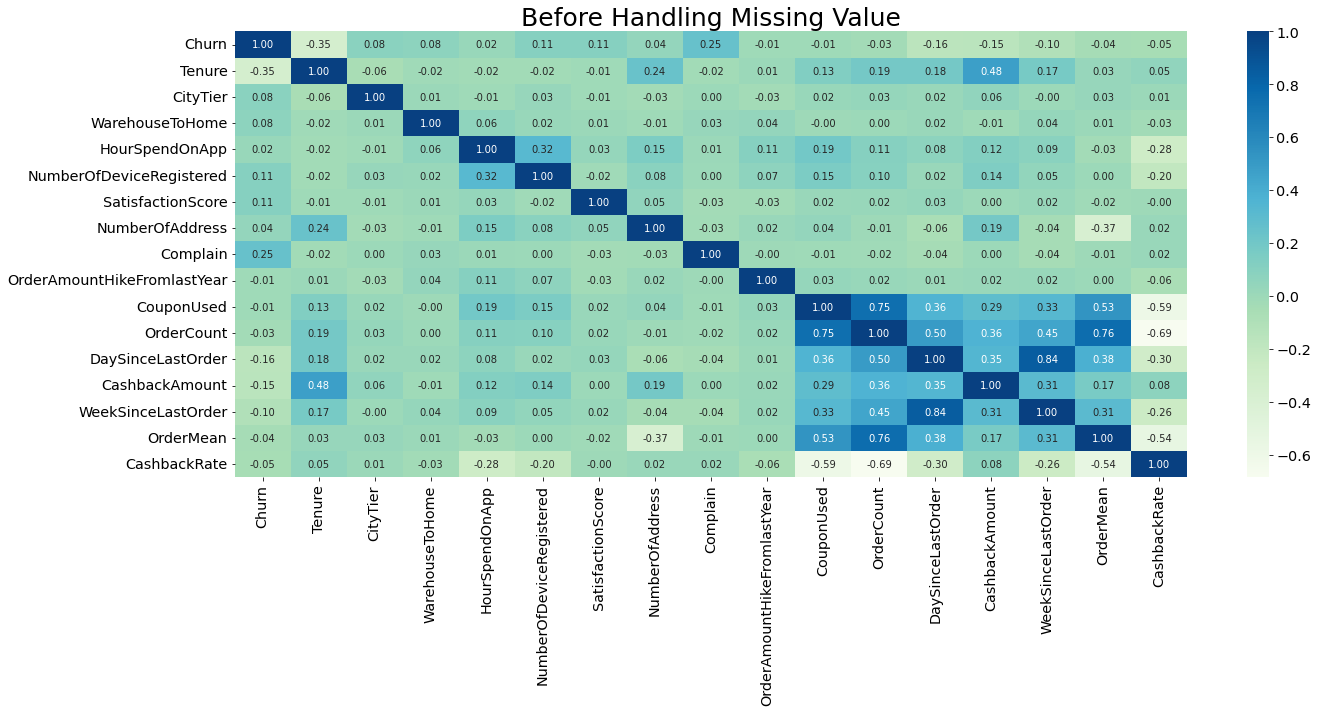

In [55]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.drop('CustomerID', axis=1).corr(), cmap='GnBu', annot=True, fmt='.2f') # nan
plt.title('Before Handling Missing Value', fontsize=25)

Text(0.5, 1.0, 'After Handling Missing Value')

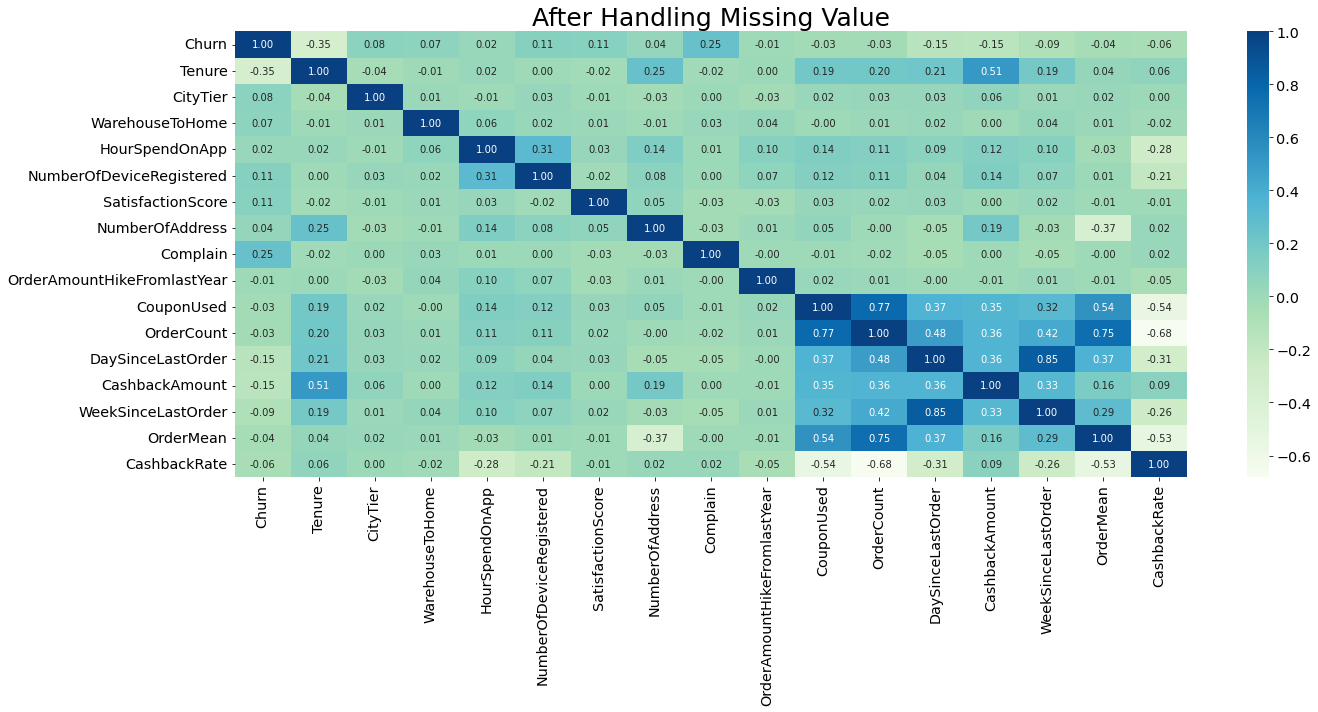

In [56]:
plt.figure(figsize=(20, 10))
sns.heatmap(dp.drop('CustomerID', axis=1).corr(), cmap='GnBu', annot=True, fmt='.2f') #non nan
plt.title('After Handling Missing Value', fontsize=25)

In [57]:
dp.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
WeekSinceLastOrder             0
OrderMean                      0
CashbackRate                   0
dtype: int64

## 2.4. GetCoupon

In [58]:
q = []
for i,kolom in dp.iterrows():
  if kolom['CouponUsed'] == 0:
    q.append(0)
  else:
    q.append(1)
dp['GetCoupon'] = q

In [59]:
dp_mishandling = dp.copy()

In [60]:
# drop 'OrderCount','CouponUsed'
dp_mishandling.drop(['OrderCount','CouponUsed','CustomerID'],axis = 1, inplace=True)
dp_days= dp_mishandling.copy()
dp_weeks= dp_mishandling.copy()
dp_days.drop('WeekSinceLastOrder',axis = 1, inplace=True)
dp_weeks.drop('DaySinceLastOrder', axis= 1, inplace=True)


In [61]:
dp_weeks.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CashbackAmount', 'WeekSinceLastOrder',
       'OrderMean', 'CashbackRate', 'GetCoupon'],
      dtype='object')

Text(0.5, 1.0, '')

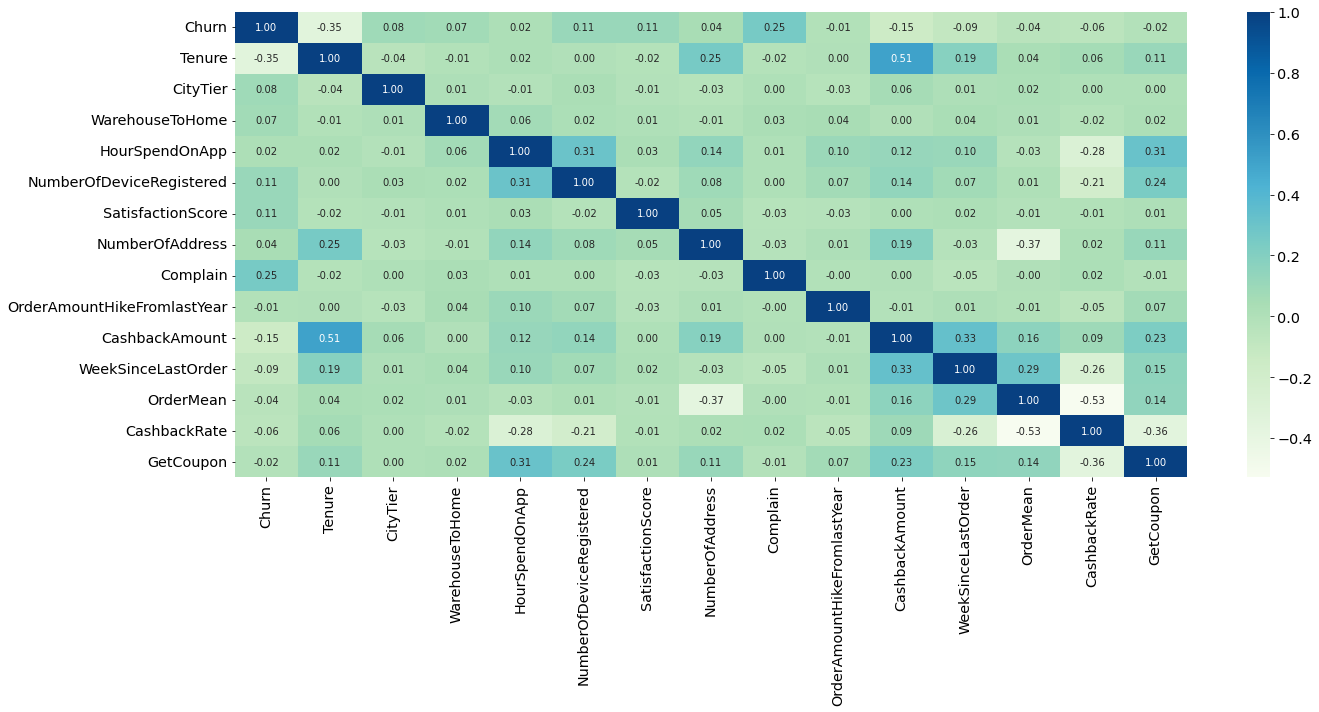

In [62]:
plt.figure(figsize=(20, 10))
sns.heatmap(dp_weeks.corr(), cmap='GnBu', annot=True, fmt='.2f') # nan
plt.title('', fontsize=25)

# 3. **Handling outliers**
- Using Z score

In [63]:
from scipy import stats

### Using Z-Score

## 3.1. Using DaySinceLastOrder

In [64]:
# Seluruh baris harus terisi, tidak boleh ada NaN, jika tidak maka akan terhapus semuanya
dp_weeks_zscore = dp_weeks.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(dp_weeks)}')

filtered_entries = np.array([True] * len(dp_weeks))
columns = ['WarehouseToHome', 'WeekSinceLastOrder', 'CashbackAmount']
#'OrderCount', 'CouponUsed'
for col in columns:
    zscore = abs(stats.zscore(dp_weeks[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dp_weeks_zscore = dp_weeks_zscore[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dp_weeks_zscore)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5550


## 3.2. Using WeekSinceLastOrder

In [65]:
dp_days_zscore = dp_days.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(dp_days)}')

filtered_entries = np.array([True] * len(dp_days))
columns = ['WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
#, 'CouponUsed'
for col in columns:
    zscore = abs(stats.zscore(dp_days[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dp_days_zscore = dp_days_zscore[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dp_days_zscore)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5573


# 4. **Feature Transformation**
- Using Log Transformation to features: WarehouseToHome, NumberOfAddress, OrderAmountHikeFromlastYear
- Using Standardization to features:Tenure, CouponUsed, DaySinceLastOrder, CashbackAmount

## 4.1. Using DaySinceLastOrder without Handling Outliers

In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

feature_log = ['WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear']
# , 'OrderCount'
dp_days_transforms = dp_days.copy()
# kita tranformasi
for i in feature_log:
    dp_days_transforms[i] = np.log(dp_days_transforms[i])

    
feature_log = ['Tenure', 'DaySinceLastOrder', 'CashbackAmount']
# , 'CouponUsed'

# kita tranformasi
for i in feature_log:
    dp_days_transforms[i] = StandardScaler().fit_transform(dp_days_transforms[i].values.reshape(len(dp_days_transforms), 1))

In [67]:
dp_days_transforms.describe().T

count          mean        std       min  \
Churn                        5630.0  1.683837e-01   0.374240  0.000000   
Tenure                       5630.0  4.038609e-17   1.000089 -1.125979   
CityTier                     5630.0  1.654707e+00   0.915389  1.000000   
WarehouseToHome              5630.0  2.616776e+00   0.501276  1.609438   
HourSpendOnApp               5630.0  2.936234e+00   0.702267  1.000000   
NumberOfDeviceRegistered     5630.0  3.688988e+00   1.023999  1.000000   
SatisfactionScore            5630.0  3.066785e+00   1.380194  1.000000   
NumberOfAddress              5630.0  1.255920e+00   0.613368  0.000000   
Complain                     5630.0  2.849023e-01   0.451408  0.000000   
OrderAmountHikeFromlastYear  5630.0  2.727586e+00   0.217814  2.397895   
DaySinceLastOrder            5630.0 -6.057913e-17   1.000089 -1.274928   
CashbackAmount               5630.0  4.038609e-17   1.000089 -3.601899   
OrderMean                    5630.0  1.038526e+00   1.362312  0.047619   
CashbackRate                 5630.0  9.514620e+01  55.961276  0.000000   
GetCoupon                    5630.0  8.170515e-01   0.386659  0.000000   

                                   25%        50%         75%         max  
Churn                         0.000000   0.000000    0.000000    1.000000  
Tenure                       -1.010051  -0.198559    0.612933    5.945596  
CityTier                      1.000000   1.000000    3.000000    3.000000  
WarehouseToHome               2.197225   2.639057    2.995732    4.844187  
HourSpendOnApp                2.000000   3.000000    3.000000    5.000000  
NumberOfDeviceRegistered      3.000000   4.000000    4.000000    6.000000  
SatisfactionScore             2.000000   3.000000    4.000000    5.000000  
NumberOfAddress               0.693147   1.098612    1.791759    3.091042  
Complain                      0.000000   0.000000    1.000000    1.000000  
OrderAmountHikeFromlastYear   2.564949   2.708050    2.890372    3.258097  
DaySinceLastOrder            -0.729043  -0.456100    0.908613   11.280436  
CashbackAmount               -0.639255  -0.283380    0.389602    3.003231  
OrderMean                     0.333333   0.500000    1.000000   15.000000  
CashbackRate                 53.026667  84.884167  130.183750  298.590000  
GetCoupon                     1.000000   1.000000    1.000000    1.000000

## 4.2. Using WeekSinceLastOrder without Handling Outliers

In [68]:
feature_log = ['WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear']
# , 'OrderCount'
dp_weeks_transforms = dp_weeks.copy()
# kita tranformasi
for i in feature_log:
    dp_weeks_transforms[i] = np.log(dp_weeks_transforms[i])

    
feature_log = ['Tenure', 'WeekSinceLastOrder', 'CashbackAmount']
#, 'CouponUsed'

# kita tranformasi
for i in feature_log:
    dp_weeks_transforms[i] = StandardScaler().fit_transform(dp_weeks_transforms[i].values.reshape(len(dp_weeks_transforms), 1))

In [69]:
dp_weeks_transforms.describe().T

count          mean        std       min  \
Churn                        5630.0  1.683837e-01   0.374240  0.000000   
Tenure                       5630.0  4.038609e-17   1.000089 -1.125979   
CityTier                     5630.0  1.654707e+00   0.915389  1.000000   
WarehouseToHome              5630.0  2.616776e+00   0.501276  1.609438   
HourSpendOnApp               5630.0  2.936234e+00   0.702267  1.000000   
NumberOfDeviceRegistered     5630.0  3.688988e+00   1.023999  1.000000   
SatisfactionScore            5630.0  3.066785e+00   1.380194  1.000000   
NumberOfAddress              5630.0  1.255920e+00   0.613368  0.000000   
Complain                     5630.0  2.849023e-01   0.451408  0.000000   
OrderAmountHikeFromlastYear  5630.0  2.727586e+00   0.217814  2.397895   
CashbackAmount               5630.0  4.038609e-17   1.000089 -3.601899   
WeekSinceLastOrder           5630.0 -2.221235e-16   1.000089 -0.577290   
OrderMean                    5630.0  1.038526e+00   1.362312  0.047619   
CashbackRate                 5630.0  9.514620e+01  55.961276  0.000000   
GetCoupon                    5630.0  8.170515e-01   0.386659  0.000000   

                                   25%        50%         75%         max  
Churn                         0.000000   0.000000    0.000000    1.000000  
Tenure                       -1.010051  -0.198559    0.612933    5.945596  
CityTier                      1.000000   1.000000    3.000000    3.000000  
WarehouseToHome               2.197225   2.639057    2.995732    4.844187  
HourSpendOnApp                2.000000   3.000000    3.000000    5.000000  
NumberOfDeviceRegistered      3.000000   4.000000    4.000000    6.000000  
SatisfactionScore             2.000000   3.000000    4.000000    5.000000  
NumberOfAddress               0.693147   1.098612    1.791759    3.091042  
Complain                      0.000000   0.000000    1.000000    1.000000  
OrderAmountHikeFromlastYear   2.564949   2.708050    2.890372    3.258097  
CashbackAmount               -0.639255  -0.283380    0.389602    3.003231  
WeekSinceLastOrder           -0.577290  -0.577290    1.490231   11.827838  
OrderMean                     0.333333   0.500000    1.000000   15.000000  
CashbackRate                 53.026667  84.884167  130.183750  298.590000  
GetCoupon                     1.000000   1.000000    1.000000    1.000000

## 4.3. Using DaySinceLastOrder with Handling Outliers

In [70]:
feature_log = ['WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear']
# , 'OrderCount'
dp_days_zscore_transforms = dp_days_zscore.copy()
# kita tranformasi
for i in feature_log:
    dp_days_zscore_transforms[i] = np.log(dp_days_zscore_transforms[i])

    
feature_log = ['Tenure', 'DaySinceLastOrder', 'CashbackAmount']
#, 'CouponUsed'

# kita tranformasi
for i in feature_log:
    dp_days_zscore_transforms[i] = StandardScaler().fit_transform(dp_days_zscore_transforms[i].values.reshape(len(dp_days_zscore_transforms), 1))

In [71]:
dp_days_zscore_transforms.describe().T

count          mean        std       min  \
Churn                        5573.0  1.699264e-01   0.375602  0.000000   
Tenure                       5573.0 -2.039958e-17   1.000090 -1.120379   
CityTier                     5573.0  1.654226e+00   0.914968  1.000000   
WarehouseToHome              5573.0  2.614602e+00   0.498723  1.609438   
HourSpendOnApp               5573.0  2.936300e+00   0.702062  1.000000   
NumberOfDeviceRegistered     5573.0  3.687780e+00   1.026282  1.000000   
SatisfactionScore            5573.0  3.061367e+00   1.377637  1.000000   
NumberOfAddress              5573.0  1.255975e+00   0.614078  0.000000   
Complain                     5573.0  2.865602e-01   0.452195  0.000000   
OrderAmountHikeFromlastYear  5573.0  2.727512e+00   0.217741  2.397895   
DaySinceLastOrder            5573.0  6.119873e-17   1.000090 -1.326225   
CashbackAmount               5573.0 -6.323869e-16   1.000090 -2.894103   
OrderMean                    5573.0  1.025903e+00   1.349385  0.047619   
CashbackRate                 5573.0  9.560902e+01  55.761432  4.111111   
GetCoupon                    5573.0  8.157186e-01   0.387748  0.000000   

                                   25%        50%         75%         max  
Churn                         0.000000   0.000000    0.000000    1.000000  
Tenure                       -1.004175  -0.190747    0.622681    5.968066  
CityTier                      1.000000   1.000000    3.000000    3.000000  
WarehouseToHome               2.197225   2.639057    2.944439    3.583519  
HourSpendOnApp                2.000000   3.000000    3.000000    5.000000  
NumberOfDeviceRegistered      3.000000   4.000000    4.000000    6.000000  
SatisfactionScore             2.000000   3.000000    4.000000    5.000000  
NumberOfAddress               0.693147   1.098612    1.791759    3.091042  
Complain                      0.000000   0.000000    1.000000    1.000000  
OrderAmountHikeFromlastYear   2.564949   2.708050    2.890372    3.258097  
DaySinceLastOrder            -0.744687  -0.453918    0.999925    3.035306  
CashbackAmount               -0.646564  -0.287231    0.390110    3.051326  
OrderMean                     0.333333   0.500000    1.000000   15.000000  
CashbackRate                 54.383333  85.190000  130.380000  298.590000  
GetCoupon                     1.000000   1.000000    1.000000    1.000000

## 4.4. Using WeekSinceLastOrder with Handling Outliers

In [72]:
feature_log = ['WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear']
# , 'OrderCount'
dp_weeks_zscore_transforms = dp_weeks_zscore.copy()
# kita tranformasi
for i in feature_log:
    dp_weeks_zscore_transforms[i] = np.log(dp_weeks_zscore_transforms[i])

    
feature_log = ['Tenure', 'WeekSinceLastOrder', 'CashbackAmount']
#, 'CouponUsed'

# kita tranformasi
for i in feature_log:
    dp_weeks_zscore_transforms[i] = StandardScaler().fit_transform(dp_weeks_zscore_transforms[i].values.reshape(len(dp_weeks_zscore_transforms), 1))

In [73]:
dp_weeks_zscore_transforms.describe().T

count          mean        std       min  \
Churn                        5550.0  1.697297e-01   0.375429  0.000000   
Tenure                       5550.0 -4.096823e-17   1.000090 -1.118886   
CityTier                     5550.0  1.655135e+00   0.915213  1.000000   
WarehouseToHome              5550.0  2.614779e+00   0.499257  1.609438   
HourSpendOnApp               5550.0  2.936937e+00   0.702687  1.000000   
NumberOfDeviceRegistered     5550.0  3.688468e+00   1.026269  1.000000   
SatisfactionScore            5550.0  3.059459e+00   1.377965  1.000000   
NumberOfAddress              5550.0  1.254929e+00   0.613761  0.000000   
Complain                     5550.0  2.866667e-01   0.452245  0.000000   
OrderAmountHikeFromlastYear  5550.0  2.727416e+00   0.217772  2.397895   
CashbackAmount               5550.0  1.433888e-16   1.000090 -2.903480   
WeekSinceLastOrder           5550.0 -8.193646e-17   1.000090 -0.587199   
OrderMean                    5550.0  1.020199e+00   1.341335  0.047619   
CashbackRate                 5550.0  9.578841e+01  55.747136  4.111111   
GetCoupon                    5550.0  8.153153e-01   0.388077  0.000000   

                                   25%        50%         75%         max  
Churn                         0.000000   0.000000    0.000000    1.000000  
Tenure                       -1.002589  -0.188507    0.625575    5.975257  
CityTier                      1.000000   1.000000    3.000000    3.000000  
WarehouseToHome               2.197225   2.639057    2.982909    3.583519  
HourSpendOnApp                2.000000   3.000000    3.000000    5.000000  
NumberOfDeviceRegistered      3.000000   4.000000    4.000000    6.000000  
SatisfactionScore             2.000000   3.000000    4.000000    5.000000  
NumberOfAddress               0.693147   1.098612    1.791759    3.091042  
Complain                      0.000000   0.000000    1.000000    1.000000  
OrderAmountHikeFromlastYear   2.564949   2.708050    2.890372    3.258097  
CashbackAmount               -0.644829  -0.287566    0.377162    3.072993  
WeekSinceLastOrder           -0.587199  -0.587199    1.703001    1.703001  
OrderMean                     0.333333   0.500000    1.000000   15.000000  
CashbackRate                 54.916667  85.290000  130.455000  298.590000  
GetCoupon                     1.000000   1.000000    1.000000    1.000000

# 5. **Feature Encoding**
- PreferredLoginDevice ====> One Hot Encoding
- PreferredPaymentMode ====> One Hot Encoding
- Gender  =================> One Hot Encoding
- PreferedOrderCat ========> One Hot Encoding
- MaritalStatus ===========> One Hot Encoding

## 5.1. Using DaySinceLastOrder without Handling Outliers

In [74]:
# WARNING: run code ini sekali saja
dp_days_transforms_onehots = dp_days_transforms.copy()

for cats in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    df_onehots = pd.get_dummies(dp_days_transforms_onehots[cats], prefix=cats)
    dp_days_transforms_onehots = dp_days_transforms_onehots.join(df_onehots)

for i in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    dp_days_transforms_onehots.drop(i,axis=1, inplace=True)
    
dp_days_transforms_onehots.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'DaySinceLastOrder',
       'CashbackAmount', 'OrderMean', 'CashbackRate', 'GetCoupon',
       'PreferredLoginDevice_Computer', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Gender_Female', 'Gender_Male'],
      dtype='object')

## 5.2. Using WeekSinceLastOrder without Handling Outliers

In [75]:
# WARNING: run code ini sekali saja
dp_weeks_transforms_onehots = dp_weeks_transforms.copy()

for cats in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    df_onehots = pd.get_dummies(dp_weeks_transforms_onehots[cats], prefix=cats)
    dp_weeks_transforms_onehots = dp_weeks_transforms_onehots.join(df_onehots)

for i in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    dp_weeks_transforms_onehots.drop(i,axis=1, inplace=True)
    
dp_weeks_transforms_onehots.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CashbackAmount',
       'WeekSinceLastOrder', 'OrderMean', 'CashbackRate', 'GetCoupon',
       'PreferredLoginDevice_Computer', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Gender_Female', 'Gender_Male'],
      dtype='object')

## 5.3. Using DaySinceLastOrder with Handling Outliers

In [76]:
# WARNING: run code ini sekali saja
dp_days_zscore_transforms_onehots = dp_days_zscore_transforms.copy()

for cats in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    df_onehots = pd.get_dummies(dp_days_zscore_transforms_onehots[cats], prefix=cats)
    dp_days_zscore_transforms_onehots = dp_days_zscore_transforms_onehots.join(df_onehots)

for i in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    dp_days_zscore_transforms_onehots.drop(i,axis=1, inplace=True)
    
dp_days_zscore_transforms_onehots.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'DaySinceLastOrder',
       'CashbackAmount', 'OrderMean', 'CashbackRate', 'GetCoupon',
       'PreferredLoginDevice_Computer', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Gender_Female', 'Gender_Male'],
      dtype='object')

## 5.4. Using WeekSinceLastOrder with Handling Outliers

In [77]:
# WARNING: run code ini sekali saja
dp_weeks_zscore_transforms_onehots = dp_weeks_zscore_transforms.copy()

for cats in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    df_onehots = pd.get_dummies(dp_weeks_zscore_transforms_onehots[cats], prefix=cats)
    dp_weeks_zscore_transforms_onehots = dp_weeks_zscore_transforms_onehots.join(df_onehots)

for i in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    dp_weeks_zscore_transforms_onehots.drop(i,axis=1, inplace=True)
    
dp_weeks_zscore_transforms_onehots.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CashbackAmount',
       'WeekSinceLastOrder', 'OrderMean', 'CashbackRate', 'GetCoupon',
       'PreferredLoginDevice_Computer', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [78]:
# Setelah melakukan beberapa Uji Coba, dipilih data dp_weeks_transforms_onehots untuk dilakukan proses pemodelan ML

dp_weeks_transforms_onehots.head(5)

Churn    Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
1255      0 -0.198559         3         3.178054               3   
1850      0 -1.125979         1         2.484907               3   
388       1 -1.125979         1         2.772589               2   
2072      0 -1.125979         1         2.397895               3   
2109      0 -1.010051         3         2.772589               3   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
1255                         3                  5         0.000000         0   
1850                         3                  1         0.693147         1   
388                          3                  3         0.693147         1   
2072                         3                  1         0.693147         0   
2109                         3                  4         0.693147         0   

      OrderAmountHikeFromlastYear  ...  PreferedOrderCat_Fashion  \
1255                     2.772589  ...                         0   
1850                     2.564949  ...                         0   
388                      2.397895  ...                         0   
2072                     2.708050  ...                         0   
2109                     3.091042  ...                         0   

      PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
1255                         0                                    1   
1850                         0                                    0   
388                          0                                    0   
2072                         0                                    0   
2109                         0                                    0   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
1255                              0                        0   
1850                              1                        0   
388                               1                        0   
2072                              1                        0   
2109                              1                        0   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
1255                       0                      1                     0   
1850                       0                      1                     0   
388                        0                      0                     1   
2072                       0                      0                     1   
2109                       0                      1                     0   

      Gender_Female  Gender_Male  
1255              0            1  
1850              1            0  
388               0            1  
2072              0            1  
2109              0            1  

[5 rows x 32 columns]

Text(0.5, 1.0, 'After Feature Encoding')

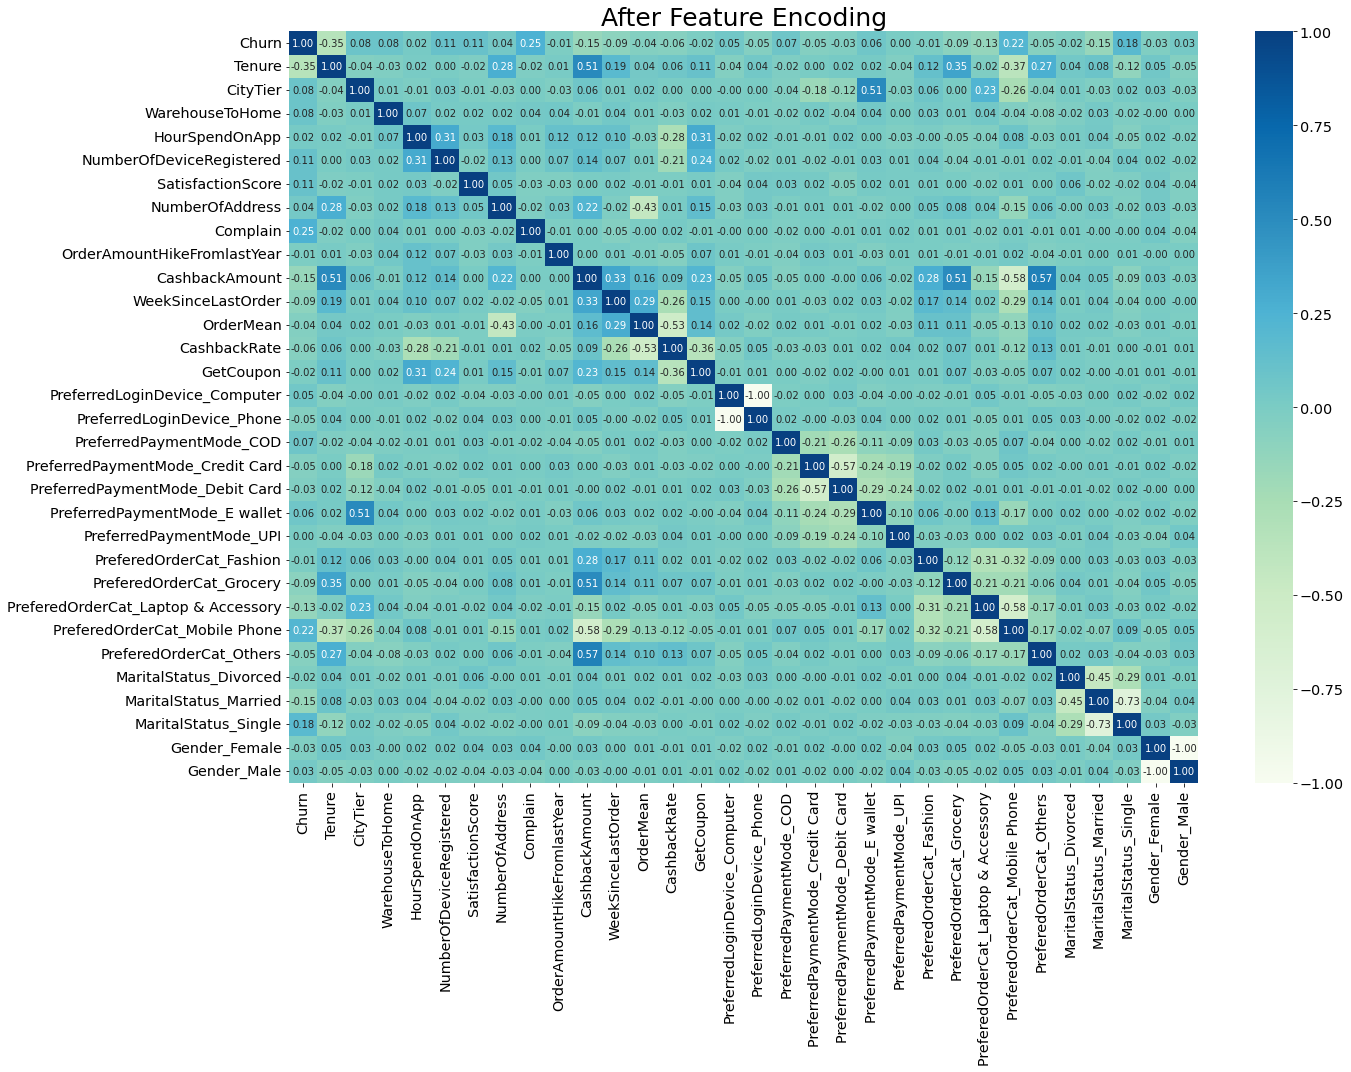

In [79]:
plt.figure(figsize=(20, 15))
sns.heatmap(dp_weeks_transforms_onehots.corr(), cmap='GnBu', annot=True, fmt='.2f') # nan
plt.title('After Feature Encoding', fontsize=25)

# Modeling

In [86]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import cross_validate

def get_metricss(y_pred, y_act, y_pred_proba, score_roc_auc, score_recall, model_name):
  
  accuracy = accuracy_score(y_act, y_pred)
  precision = precision_score(y_act, y_pred)
  recall =  recall_score(y_act, y_pred)
  # roc_auc = roc_auc_score(y_act, y_pred)
  f1 = f1_score(y_act, y_pred)
  # accuracy = balanced_accuracy_score(y_act, y_pred)
  

  roc_auc_proba = roc_auc_score(y_act, y_pred_proba[:, 1])
  # roc_auc(crossval-train) = score['train_score'].mean()
  # roc_auc(crossval-test) = score['test_score'].mean()

  metrics_result = dict(model_name=model_name,
                        accuracy=accuracy,
                        precision=precision, 
                        recall=recall,
                        # roc_auc=roc_auc, 
                        f1=f1,
                        roc_auc_proba=roc_auc_proba,
                        score_roc_auc=score_roc_auc,
                        score_recall=score_recall
                        )
  
  return metrics_result


def predictionn(X_train, y_train, X_test, y_test, model, model_name='decision tree'):
  
  model = model
  y_test_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)

  # y_pred = model.predict(X_test)
  # y_pred_train = model.predict(X_train)
  y_pred_proba = model.predict_proba(X_test)
  y_pred_proba_train = model.predict_proba(X_train)

  skor = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
  score_train = skor['train_score'].mean()
  score_test = skor['test_score'].mean()
    
  skor_recall = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
  score_train_recall = skor_recall['train_score'].mean()
  score_test_recall = skor_recall['test_score'].mean()
  result = dict()
  test_result = get_metricss(y_pred=y_test_pred, y_act=y_test, y_pred_proba=y_pred_proba, score_roc_auc=score_test, score_recall=score_test_recall, model_name=model_name)
  train_result = get_metricss(y_pred=y_train_pred, y_act=y_train, y_pred_proba=y_pred_proba_train, score_roc_auc=score_train,score_recall=score_train_recall, model_name=model_name)

  result['test'] = test_result
  result['train'] = train_result
  result['y_test'] = y_test
  result['y_test_pred'] = y_test_pred
  result['y_train'] = y_train
  result['y_train_pred'] = y_train_pred
  result['model'] = model
  result['X_train'] = X_train
  result['X_test'] = X_test

  del model

  return result

## Logistic Regression

In [167]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split

LR = pd.DataFrame()
LR_smote = pd.DataFrame()
a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}
# a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LogisticRegression() # inisiasi object dengan nama logreg
  model.fit(X_train, y_train) # fit model regression dari data train
  # eval_classification(logreg)

  LR3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i)
  LR1 = LR3['train']
  LR2 = LR3['test']
  LR = LR.append(LR1,ignore_index=True)
  LR = LR.append(LR2,ignore_index=True)
LR


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LogisticRegression() # inisiasi object dengan nama logreg
  model.fit(X_train, y_train) # fit model regression dari data train
  # eval_classification(logreg)

  LR3_smote = predictionn(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  LR1_smote = LR3_smote['train']
  # LR2_smote = LR3_smote
  LR2_smote = LR3_smote['test']
  LR_smote = LR_smote.append(LR1_smote,ignore_index=True)
  LR_smote = LR_smote.append(LR2_smote,ignore_index=True)
LR = LR.append(LR_smote)
LR


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  0.886323   0.732342  0.517060  0.606154   
1       dp_days_transforms_onehots  0.881883   0.705426  0.489247  0.577778   
0  dp_days_transforms_onehotsSMOTE  0.866323   0.826879  0.764613  0.794528   
1  dp_days_transforms_onehotsSMOTE  0.855516   0.778555  0.755656  0.766935   

   roc_auc_proba  score_roc_auc  score_recall  
0       0.887996       0.894663      0.513969  
1       0.899514       0.866829      0.416697  
0       0.927534       0.934362      0.772532  
1       0.925682       0.852172      0.743671

In [168]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split

LR = pd.DataFrame()
LR_smote = pd.DataFrame()
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}
# a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LogisticRegression() # inisiasi object dengan nama logreg
  model.fit(X_train, y_train) # fit model regression dari data train
  # eval_classification(logreg)

  LR3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i)
  LR1 = LR3['train']
  LR2 = LR3['test']
  LR = LR.append(LR1,ignore_index=True)
  LR = LR.append(LR2,ignore_index=True)
LR


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LogisticRegression() # inisiasi object dengan nama logreg
  model.fit(X_train, y_train) # fit model regression dari data train
  # eval_classification(logreg)

  LR3_smote = predictionn(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  LR1_smote = LR3_smote['train']
  # LR2_smote = LR3_smote
  LR2_smote = LR3_smote['test']
  LR_smote = LR_smote.append(LR1_smote,ignore_index=True)
  LR_smote = LR_smote.append(LR2_smote,ignore_index=True)
LR = LR.append(LR_smote)
LR


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  0.888766   0.752418  0.510499  0.608288   
1       dp_weeks_transforms_onehots  0.885435   0.720930  0.500000  0.590476   
0  dp_weeks_transforms_onehotsSMOTE  0.875044   0.838327  0.780937  0.808615   
1  dp_weeks_transforms_onehotsSMOTE  0.874021   0.813239  0.778281  0.795376   

   roc_auc_proba  score_roc_auc  score_recall  
0       0.887830       0.892932      0.501307  
1       0.898113       0.863239      0.412515  
0       0.931399       0.935933      0.774453  
1       0.928983       0.856386      0.747918

## Logistic Regression Hyperparameter Tuning

In [171]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

LR_hyper = pd.DataFrame()
LR_smote = pd.DataFrame()

penalty = ['l1','l2','elasticnet','none']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots,}
# a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  logreg = LogisticRegression() # inisiasi object dengan nama logreg
  model = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
  model.fit(X_train, y_train) # fit model regression dari data train
  # eval_classification(logreg)

  LR3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i)
  LR1 = LR3['train']
  LR2 = LR3['test']
  LR_hyper = LR_hyper.append(LR1,ignore_index=True)
  LR_hyper = LR_hyper.append(LR2,ignore_index=True)
LR_hyper


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  logreg = LogisticRegression() # inisiasi object dengan nama logreg
  model = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
  model.fit(X_train, y_train) # fit model regression dari data train
  # eval_classification(logreg)

  LR3_smote = predictionn(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  LR1_smote = LR3_smote['train']
  # LR2_smote = LR3_smote
  LR2_smote = LR3_smote['test']
  LR_smote = LR_smote.append(LR1_smote,ignore_index=True)
  LR_smote = LR_smote.append(LR2_smote,ignore_index=True)
LR_hyper = LR_hyper.append(LR_smote)
LR_hyper


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning:

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio 

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of i

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of i

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_rati

model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  0.893206   0.776031  0.518373  0.621558   
1       dp_weeks_transforms_onehots  0.885435   0.711111  0.516129  0.598131   
0  dp_weeks_transforms_onehotsSMOTE  0.888928   0.877890  0.779884  0.825990   
1  dp_weeks_transforms_onehotsSMOTE  0.897509   0.853081  0.814480  0.833333   

   roc_auc_proba  score_roc_auc  score_recall  
0       0.893584       0.896723      0.502645  
1       0.902620       0.878991      0.402885  
0       0.942363       0.945431      0.779580  
1       0.940251       0.898085      0.737235

## kNN

In [172]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split

kNN = pd.DataFrame()
kNN_smote = pd.DataFrame()
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # knn
  from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
  model = KNeighborsClassifier() # inisiasi object dengan nama knn
  model.fit(X_train, y_train) # fit model KNN dari data train
  # eval_classification(knn)
 

  kNN3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i)
  
  kNN2 = kNN3['test']
  kNN1 = kNN3['train']
  kNN = kNN.append(kNN1,ignore_index=True)
  kNN = kNN.append(kNN2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = KNeighborsClassifier() # inisiasi object dengan nama logreg
  model.fit(X_train, y_train) # fit model regression dari data train
  # eval_classification(logreg)

  kNN_smote3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')

  kNN_smote2 = kNN_smote3['test']
  kNN_smote1 = kNN_smote3['train']
  kNN_smote = kNN_smote.append(kNN_smote1,ignore_index=True)
  kNN_smote = kNN_smote.append(kNN_smote2,ignore_index=True)
kNN = kNN.append(kNN_smote)
kNN


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  0.908970   0.860656  0.551181  0.672000   
1       dp_weeks_transforms_onehots  0.880995   0.760000  0.408602  0.531469   
0  dp_weeks_transforms_onehotsSMOTE  0.938768   0.859122  0.979463  0.915354   
1  dp_weeks_transforms_onehotsSMOTE  0.891815   0.764599  0.947964  0.846465   

   roc_auc_proba  score_roc_auc  score_recall  
0       0.961536       0.971313      0.583846  
1       0.871969       0.653504      0.321949  
0       0.993299       0.994084      0.978214  
1       0.969841       0.773844      0.948733

## kNN Hyperparameter Tuning

In [ ]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split

kNN_hyper = pd.DataFrame()
kNN_smote = pd.DataFrame()
n_neighbors = list(range(1,30))
p=[1,2,3]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
  knn = KNeighborsClassifier() # inisiasi object dengan nama knn
  model = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
  model.fit(X_train, y_train) # fit model KNN dari data train
 

  kNN3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i)
  
  kNN2 = kNN3['test']
  kNN1 = kNN3['train']
  kNN_hyper = kNN_hyper.append(kNN1,ignore_index=True)
  kNN_hyper = kNN_hyper.append(kNN2,ignore_index=True)


for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  knn = KNeighborsClassifier() # inisiasi object dengan nama logreg
  model = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
  model.fit(X_train, y_train) # fit model regression dari data train

  kNN_hyp_smote3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  kNN_smote2 = kNN_hyp_smote3['test']
  kNN_smote1 = kNN_hyp_smote3['train']
  kNN_smote = kNN_smote.append(kNN_smote1,ignore_index=True)
  kNN_smote = kNN_smote.append(kNN_smote2,ignore_index=True)
kNN_hyper = kNN_hyper.append(kNN_smote)
kNN_hyper


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  1.000000   1.000000  1.000000  1.000000   
1       dp_days_transforms_onehots  0.949378   0.970803  0.715054  0.823529   
0  dp_days_transforms_onehotsSMOTE  1.000000   1.000000  1.000000  1.000000   
1  dp_days_transforms_onehotsSMOTE  0.952313   0.891441  0.966063  0.927253   

   roc_auc_proba     score  
0       1.000000  1.000000  
1       0.970659  0.719009  
0       1.000000  1.000000  
1       0.993069  0.809409

In [178]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split

kNN_hyper = pd.DataFrame()
kNN_smote = pd.DataFrame()
n_neighbors = list(range(1,30))
p=[1,2,3]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
  knn = KNeighborsClassifier() # inisiasi object dengan nama knn
  model = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
  model.fit(X_train, y_train) # fit model KNN dari data train
 

  kNN3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i)
  
  kNN2 = kNN3['test']
  kNN1 = kNN3['train']
  kNN_hyper = kNN_hyper.append(kNN1,ignore_index=True)
  kNN_hyper = kNN_hyper.append(kNN2,ignore_index=True)


for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  knn = KNeighborsClassifier() # inisiasi object dengan nama logreg
  model = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
  model.fit(X_train, y_train) # fit model regression dari data train

  kNN_hyp_smote3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  kNN_smote2 = kNN_hyp_smote3['test']
  kNN_smote1 = kNN_hyp_smote3['train']
  kNN_smote = kNN_smote.append(kNN_smote1,ignore_index=True)
  kNN_smote = kNN_smote.append(kNN_smote2,ignore_index=True)
kNN_hyper = kNN_hyper.append(kNN_smote)
kNN_hyper


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  1.000000   1.000000  1.000000  1.000000   
1       dp_weeks_transforms_onehots  0.943162   0.955224  0.688172  0.800000   
0  dp_weeks_transforms_onehotsSMOTE  1.000000   1.000000  1.000000  1.000000   
1  dp_weeks_transforms_onehotsSMOTE  0.955160   0.887526  0.981900  0.932331   

   roc_auc_proba  score_roc_auc  score_recall  
0       1.000000       1.000000      1.000000  
1       0.972166       0.726057      0.348254  
0       1.000000       1.000000      1.000000  
1       0.995099       0.810588      0.985901

## DecisionTree

In [179]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn

DT = pd.DataFrame()
DT_smote = pd.DataFrame()
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}
# a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  model = DecisionTreeClassifier() # inisiasi object dengan nama dt
  model.fit(X_train, y_train) # fit model decision tree dari data train
  DT3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i)
  DT2 = DT3['test']
  DT1 = DT3['train']
  DT = DT.append(DT1,ignore_index=True)
  DT = DT.append(DT2,ignore_index=True)

# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # decision tree
  model = DecisionTreeClassifier() # inisiasi object dengan nama dt
  model.fit(X_train, y_train) # fit model decision tree dari data train
  # eval_classification(dt)

  DT_smote3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  DT_smote2 = DT_smote3['test']
  DT_smote1 = DT_smote3['train']
  DT_smote = DT_smote.append(DT_smote1,ignore_index=True)
  DT_smote = DT_smote.append(DT_smote2,ignore_index=True)
DT = DT.append(DT_smote)
DT


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  1.000000   1.000000  1.000000  1.000000   
1       dp_weeks_transforms_onehots  0.974245   0.902564  0.946237  0.923885   
0  dp_weeks_transforms_onehotsSMOTE  1.000000   1.000000  1.000000  1.000000   
1  dp_weeks_transforms_onehotsSMOTE  0.963701   0.937360  0.947964  0.942632   

   roc_auc_proba  score_roc_auc  score_recall  
0       1.000000       1.000000      1.000000  
1       0.963012       0.810942      0.716324  
0       1.000000       1.000000      1.000000  
1       0.959444       0.755236      0.869260

## DecisionTree Hyperparameter Tuning

In [180]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn

DT = pd.DataFrame()
DT_smote = pd.DataFrame()
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2'] # Number of features to consider at every split
criterion = ['gini','entropy','log_loss']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
  model = RandomizedSearchCV(dt, hyperparameters, scoring='recall', random_state=1, cv=5)
  model.fit(X_train, y_train) # fit model decision tree dari data train
  DT3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i)
  DT2 = DT3['test']
  DT1 = DT3['train']
  DT = DT.append(DT1,ignore_index=True)
  DT = DT.append(DT2,ignore_index=True)

# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # decision tree
  dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
  model = RandomizedSearchCV(dt, hyperparameters, scoring='recall', random_state=1, cv=5)
  model.fit(X_train, y_train) # fit model decision tree dari data train
  # eval_classification(dt)

  DT_smote_hype_3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  DT_smote2 = DT_smote_hype_3['test']
  DT_smote1 = DT_smote_hype_3['train']
  DT_smote = DT_smote.append(DT_smote1,ignore_index=True)
  DT_smote = DT_smote.append(DT_smote2,ignore_index=True)
DT = DT.append(DT_smote)
DT


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  1.000000   1.000000  1.000000  1.000000   
1       dp_weeks_transforms_onehots  0.953819   0.848958  0.876344  0.862434   
0  dp_weeks_transforms_onehotsSMOTE  1.000000   1.000000  1.000000  1.000000   
1  dp_weeks_transforms_onehotsSMOTE  0.916014   0.841772  0.902715  0.871179   

   roc_auc_proba  score_roc_auc  score_recall  
0       1.000000       0.999642      0.985224  
1       0.922747       0.773227      0.569758  
0       1.000000       1.000000      1.000000  
1       0.912417       0.831057      0.870110

## RANDOM FOREST

In [185]:
# GET COUPON + WEEKS
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
RF = pd.DataFrame()
RF_smote = pd.DataFrame()
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}
# a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Bagging: Random Forest

  model = RandomForestClassifier(random_state=42)
  model.fit(X_train, y_train)

  RF3 = predictionn(X_train, y_train, X_test, y_test, model = model, model_name=i)
  RF2 = RF3['test']
  RF1 = RF3['train']
  RF = RF.append(RF1,ignore_index=True)
  RF = RF.append(RF2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # RANDOMFOREST
  model = RandomForestClassifier(random_state=42)
  model.fit(X_train, y_train)
  # eval_classification(dt)

  RF_smote3 = predictionn(X_train, y_train, X_test, y_test, model = model, model_name=i + 'SMOTE')
  
  RF_smote2 = RF_smote3['test']
  RF_smote1 = RF_smote3['train']
  RF_smote = RF_smote.append(RF_smote1,ignore_index=True)
  RF_smote = RF_smote.append(RF_smote2,ignore_index=True)
RF = RF.append(RF_smote)
RF

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  1.000000   1.000000  1.000000  1.000000   
1       dp_weeks_transforms_onehots  0.974245   0.987578  0.854839  0.916427   
0  dp_weeks_transforms_onehotsSMOTE  1.000000   1.000000  1.000000  1.000000   
1  dp_weeks_transforms_onehotsSMOTE  0.981495   0.970588  0.970588  0.970588   

   roc_auc_proba  score_roc_auc  score_recall  
0       1.000000       1.000000      1.000000  
1       0.996082       0.940435      0.617371  
0       1.000000       1.000000      1.000000  
1       0.998258       0.936477      0.915833

In [184]:
# GET COUPON + WEEKS
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
RF = pd.DataFrame()
RF_smote = pd.DataFrame()
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}
# a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

n_estimators = [int(x) for x in np.linspace(1, 300, 60)]
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
max_features = ['auto', 'sqrt', 'log2'] # Number of features to consider at every split
criterion = ['gini','entropy','log_loss']
splitter = ['best','random']
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# rf = RandomForestClassifier(random_state=42)
# rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
# rs.fit(X_train, y_train)

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Bagging: Random Forest

  rf = RandomForestClassifier(random_state=42)
  mode = RandomizedSearchCV(rf, hyperparameters, scoring='recall',random_state=10, cv=5)
  mode.fit(X_train, y_train)

  RF3 = predictionn(X_train, y_train, X_test, y_test, model = mode, model_name=i)
  RF2 = RF3['test']
  RF1 = RF3['train']
  RF = RF.append(RF1,ignore_index=True)
  RF = RF.append(RF2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # RANDOMFOREST
  rf = RandomForestClassifier(random_state=42)
  mode = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=10,cv=5)
  mode.fit(X_train, y_train)
  # eval_classification(dt)

  RF_smote_hype_3 = predictionn(X_train, y_train, X_test, y_test, model = mode, model_name=i + 'SMOTE')
  
  RF_smote2 = RF_smote_hype_3['test']
  RF_smote1 = RF_smote_hype_3['train']
  RF_smote = RF_smote.append(RF_smote1,ignore_index=True)
  RF_smote = RF_smote.append(RF_smote2,ignore_index=True)
RF = RF.append(RF_smote)
RF

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  0.972691   0.993818  0.843832  0.912704   
1       dp_weeks_transforms_onehots  0.945826   0.943262  0.715054  0.813456   
0  dp_weeks_transforms_onehotsSMOTE  0.987006   0.991389  0.969984  0.980570   
1  dp_weeks_transforms_onehotsSMOTE  0.953737   0.937355  0.914027  0.925544   

   roc_auc_proba  score_roc_auc  score_recall  
0       0.998931       0.998919      0.857081  
1       0.983705       0.928462      0.512938  
0       0.999457       0.999659      0.976506  
1       0.991394       0.907056      0.868830

## AdaBoost

In [186]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
AB = pd.DataFrame()
AB_smote = pd.DataFrame()
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Boosting: AdaBoost

  model = AdaBoostClassifier()
  model.fit(X_train, y_train)

  AB3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i)
  AB2 = AB3['test']
  AB1 = AB3['train']
  AB = AB.append(AB1,ignore_index=True)
  AB = AB.append(AB2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # ADABOOST
  model = AdaBoostClassifier()
  model.fit(X_train, y_train)


  AB_smote3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  AB_smote2 = AB_smote3['test']
  AB_smote1 = AB_smote3['train']
  AB_smote = AB_smote.append(AB_smote1,ignore_index=True)
  AB_smote = AB_smote.append(AB_smote2,ignore_index=True)
AB = AB.append(AB_smote)
AB


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  0.897425   0.756849  0.580052  0.656761   
1       dp_weeks_transforms_onehots  0.902309   0.792308  0.553763  0.651899   
0  dp_weeks_transforms_onehotsSMOTE  0.880028   0.838960  0.798315  0.818133   
1  dp_weeks_transforms_onehotsSMOTE  0.879715   0.809524  0.807692  0.808607   

   roc_auc_proba  score_roc_auc  score_recall  
0       0.923597       0.929798      0.602843  
1       0.910238       0.857312      0.421977  
0       0.947127       0.952064      0.808948  
1       0.942549       0.823920      0.771432

## AdaBoost Hyperparameter Tuning

In [187]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
AB_hyper = pd.DataFrame()
AB_smote = pd.DataFrame()
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}
# a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}
# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Boosting: AdaBoost
# ab = AdaBoostClassifier(random_state=42)
  ab = AdaBoostClassifier()
  model = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
  model.fit(X_train, y_train)

  AB_hyper3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i)
  AB_hyper2 = AB_hyper3['test']
  AB_hyper1 = AB_hyper3['train']
  AB_hyper = AB_hyper.append(AB_hyper1,ignore_index=True)
  AB_hyper = AB_hyper.append(AB_hyper2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # ADABOOST
  ab = AdaBoostClassifier()
  model = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
  model.fit(X_train, y_train)


  AB_smote_hype_3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  AB_smote2 = AB_smote_hype_3['test']
  AB_smote1 = AB_smote_hype_3['train']
  AB_smote = AB_smote.append(AB_smote1,ignore_index=True)
  AB_smote = AB_smote.append(AB_smote2,ignore_index=True)
AB_hyper = AB_hyper.append(AB_smote)
AB_hyper


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  0.903419   0.782383  0.594488  0.675615   
1       dp_weeks_transforms_onehots  0.898757   0.768657  0.553763  0.643750   
0  dp_weeks_transforms_onehotsSMOTE  0.890886   0.861236  0.807267  0.833379   
1  dp_weeks_transforms_onehotsSMOTE  0.896085   0.837900  0.830317  0.834091   

   roc_auc_proba  score_roc_auc  score_recall  
0       0.932779       0.937875      0.604954  
1       0.918325       0.871016      0.411390  
0       0.955649       0.943278      0.807126  
1       0.952056       0.808595      0.739022

## XGBoost

In [188]:
# HARI INI
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

XG = pd.DataFrame()
XG_smote = pd.DataFrame()
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Boosting: XGBoost

  xg = XGBClassifier()
  xg.fit(X_train, y_train)

  XG3 = predictionn(X_train, y_train, X_test, y_test, xg, model_name=i)
  XG2 = XG3['test']
  XG1 = XG3['train']
  XG = XG.append(XG1,ignore_index=True)
  XG = XG.append(XG2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # xgboost
  xg1 = XGBClassifier()
  xg1.fit(X_train, y_train)
  

  XG_smote3 = predictionn(X_train, y_train, X_test, y_test, xg1, model_name=i + 'SMOTE')
  
  XG_smote2 = XG_smote3['test']
  XG_smote1 = XG_smote3['train']
  XG_smote = XG_smote.append(XG_smote1,ignore_index=True)
  XG_smote = XG_smote.append(XG_smote2,ignore_index=True)
XG = XG.append(XG_smote)
XG


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  1.000000   1.000000  1.000000  1.000000   
1       dp_weeks_transforms_onehots  0.979574   0.982249  0.892473  0.935211   
0  dp_weeks_transforms_onehotsSMOTE  1.000000   1.000000  1.000000  1.000000   
1  dp_weeks_transforms_onehotsSMOTE  0.982918   0.970721  0.975113  0.972912   

   roc_auc_proba  score_roc_auc  score_recall  
0       1.000000       1.000000      1.000000  
1       0.994075       0.927819      0.667948  
0       1.000000       1.000000      1.000000  
1       0.997714       0.920501      0.912828

## XGBoost Hyperparameter Tuning

In [191]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

XG = pd.DataFrame()
XG_smote = pd.DataFrame()
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}

hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }


for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Boosting: XGBoost

  xg = XGBClassifier()
  model = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
  model.fit(X_train, y_train)

  XG3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i)
  XG2 = XG3['test']
  XG1 = XG3['train']
  XG = XG.append(XG1,ignore_index=True)
  XG = XG.append(XG2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # xgboost
  xg = XGBClassifier()
  model = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
  model.fit(X_train, y_train)
  

  XG_smote_hyper_3 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  XG_smote2 = XG_smote_hyper_3['test']
  XG_smote1 = XG_smote_hyper_3['train']
  XG_smote = XG_smote.append(XG_smote1,ignore_index=True)
  XG_smote = XG_smote.append(XG_smote2,ignore_index=True)
XG = XG.append(XG_smote)
XG


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  0.998890   0.998682  0.994751  0.996713   
1       dp_weeks_transforms_onehots  0.973357   0.964286  0.870968  0.915254   
0  dp_weeks_transforms_onehotsSMOTE  0.999644   0.998948  1.000000  0.999474   
1  dp_weeks_transforms_onehotsSMOTE  0.980071   0.964126  0.972851  0.968468   

   roc_auc_proba  score_roc_auc  score_recall  
0       0.999995       1.000000      0.998682  
1       0.986376       0.913729      0.662701  
0       0.999986       1.000000      0.999359  
1       0.997030       0.911818      0.901727

## CatBoost

In [189]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import catboost as CatBoostClassifier

CB = pd.DataFrame()
CB_smote = pd.DataFrame()
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  LI = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent')
  LI.fit(X_train,y_train)

  CB3 = predictionn(X_train, y_train, X_test, y_test, LI, model_name=i)
  CB2 = CB3['test']
  CB1 = CB3['train']
  CB = CB.append(CB1,ignore_index=True)
  CB = CB.append(CB2,ignore_index=True)

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  li = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent')
  li.fit(X_train,y_train)
  

  CB_smote3 = predictionn(X_train, y_train, X_test, y_test, li, model_name=i + 'SMOTE')
  
  CB_smote2 = CB_smote3['test']
  CB_smote1 = CB_smote3['train']
  CB_smote = CB_smote.append(CB_smote1,ignore_index=True)
  CB_smote = CB_smote.append(CB_smote2,ignore_index=True)
CB = CB.append(CB_smote)
CB


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  0.992007   0.993207  0.959318  0.975968   
1       dp_weeks_transforms_onehots  0.967140   0.968553  0.827957  0.892754   
0  dp_weeks_transforms_onehotsSMOTE  0.994126   0.993651  0.988942  0.991291   
1  dp_weeks_transforms_onehotsSMOTE  0.975801   0.963636  0.959276  0.961451   

   roc_auc_proba  score_roc_auc  score_recall  
0       0.999774       0.999907      0.974420  
1       0.993240       0.933447      0.625709  
0       0.999827       0.999859      0.990602  
1       0.996116       0.933413      0.886761

## CatBoost Hyperparameter Tuning

In [190]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import catboost as CatBoostClassifier
CB_hyper_ = pd.DataFrame()
CB_smote_ = pd.DataFrame()
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)]
                      )
for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Boosting: XGBoost

  cb = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent')
  model = RandomizedSearchCV(cb, hyperparameters, cv=5, random_state=42, scoring='recall')
  model.fit(X_train, y_train)

  CB_hyper33 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i)
  CB_hyper22 = CB_hyper33['test']
  CB_hyper11 = CB_hyper33['train']
  CB_hyper_ = CB_hyper_.append(CB_hyper11,ignore_index=True)
  CB_hyper_ = CB_hyper_.append(CB_hyper22,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # xgboost
  cb = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent')
  model = RandomizedSearchCV(cb, hyperparameters, cv=5, random_state=42, scoring='recall')
  model.fit(X_train, y_train)
  

  CB_smote33 = predictionn(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  CB_smote22 = CB_smote33['test']
  CB_smote11 = CB_smote33['train']
  CB_smote_ = CB_smote_.append(CB_smote11,ignore_index=True)
  CB_smote_ = CB_smote_.append(CB_smote22,ignore_index=True)
CB_hyper_ = CB_hyper_.append(CB_smote_)
CB_hyper_

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  1.000000   1.000000  1.000000  1.000000   
1       dp_weeks_transforms_onehots  0.984014   0.977273  0.924731  0.950276   
0  dp_weeks_transforms_onehotsSMOTE  1.000000   1.000000  1.000000  1.000000   
1  dp_weeks_transforms_onehotsSMOTE  0.987900   0.975391  0.986425  0.980877   

   roc_auc_proba  score_roc_auc  score_recall  
0       1.000000       1.000000      1.000000  
1       0.996786       0.938422      0.670086  
0       1.000000       1.000000      1.000000  
1       0.997451       0.947595      0.919237

In [84]:
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split
import catboost as CatBoostClassifier
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}
def draw_learning_curve_CB(param_values):
    train_scores = []
    test_scores = []
    # param = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': c, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 127, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

    for c in param_values:
        model = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent',n_estimators = c)
        model.fit(X_train, y_train)

        # eval on train
        skor_recall = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
        train_auc = skor_recall['train_score'].mean()
        train_scores.append(train_auc)

        # eval on test
        # skor_recall = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
        test_auc = skor_recall['test_score'].mean()
        test_scores.append(test_auc)

#         print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
        print(f'param value: {c}; train: {train_auc}; test: {test_auc}; selisih train-test: {train_auc-test_auc}')
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('Recall Cross Validation')
    plt.title('Learning Curve - Hyperparameter C - CatBoost')
    plt.legend()
    plt.show()
for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


param value: 1; train: 0.6724674980948339; test: 0.670662256483152; selisih train-test: 0.0018052416116818293
param value: 106; train: 0.9821652497706955; test: 0.8820704171450441; selisih train-test: 0.10009483262565144
param value: 211; train: 0.9848353913690273; test: 0.8795054033860005; selisih train-test: 0.10532998798302684
param value: 316; train: 0.9881461022811797; test: 0.8859138374063746; selisih train-test: 0.10223226487480508
param value: 421; train: 0.9873982960742171; test: 0.8829242068048039; selisih train-test: 0.10447408926941326
param value: 527; train: 0.9894273549906224; test: 0.8884761175805952; selisih train-test: 0.1009512374100272
param value: 632; train: 0.9893204603428842; test: 0.888052411933009; selisih train-test: 0.10126804840987524
param value: 737; train: 0.9898545342952711; test: 0.889332640825178; selisih train-test: 0.1005218934700931
param value: 842; train: 0.9906021123386314; test: 0.8880515007380678; selisih train-test: 0.10255061160056356
param 

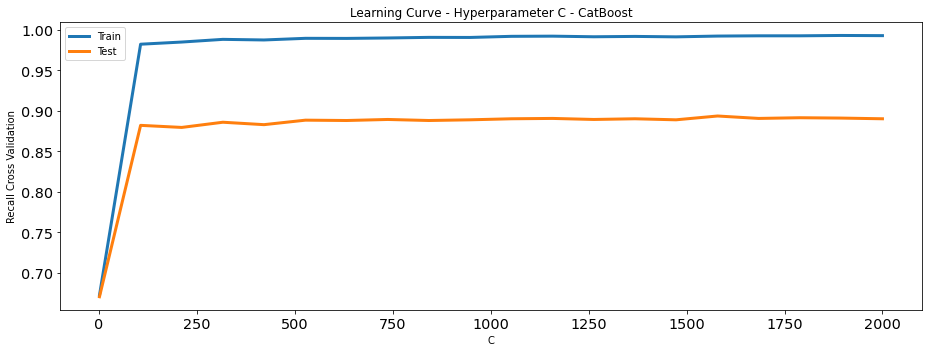

In [87]:
import numpy as np
param_values = [int(x) for x in np.linspace(start = 1, stop = 2000, num = 20)]
draw_learning_curve_CB(param_values) 
# n_estimators= 30; train: 0.7080317580918221; test: 0.6966960071437683

In [90]:
def draw_learning_curve_CB2(param_values):
    train_scores = []
    test_scores = []
    # param = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': c, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 127, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

    for c in param_values:
        model = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent',learning_rate = c)
        model.fit(X_train, y_train)

        # eval on train
        skor_recall = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
        train_auc = skor_recall['train_score'].mean()
        train_scores.append(train_auc)

        # eval on test
        # skor_recall = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
        test_auc = skor_recall['test_score'].mean()
        test_scores.append(test_auc)

        # print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + ';selisih train-test: ' str(train_auc-test_auc) )
        print(f'param value: {c}; train: {train_auc}; test: {test_auc}; selisih train-test: {train_auc-test_auc}')
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('Recall Cross Validation')
    plt.title('Learning Curve - Hyperparameter C - CatBoost')
    plt.legend()
    plt.show()
X = a[i].drop(['Churn'], axis=1)
y = a[i]['Churn']
X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


param value: 0.002611111111111111; train: 0.8374602995331772; test: 0.8051846992145499; selisih train-test: 0.03227560031862731
param value: 0.0027283950617283947; train: 0.838955398578997; test: 0.8094536475133491; selisih train-test: 0.029501751065647897
param value: 0.002845679012345679; train: 0.8415181321614851; test: 0.8098828203305815; selisih train-test: 0.03163531183090362
param value: 0.002962962962962963; train: 0.8433337440278177; test: 0.8094545587082902; selisih train-test: 0.033879185319527494
param value: 0.0030802469135802466; train: 0.8454695835101601; test: 0.812444189309861; selisih train-test: 0.03302539420029915
param value: 0.003197530864197531; train: 0.8496343678271068; test: 0.8128706285422703; selisih train-test: 0.03676373928483645
param value: 0.0033148148148148147; train: 0.8508092392569168; test: 0.8141490350445574; selisih train-test: 0.03666020421235938
param value: 0.0034320987654320985; train: 0.8535855910121792; test: 0.8188508009403531; selisih trai

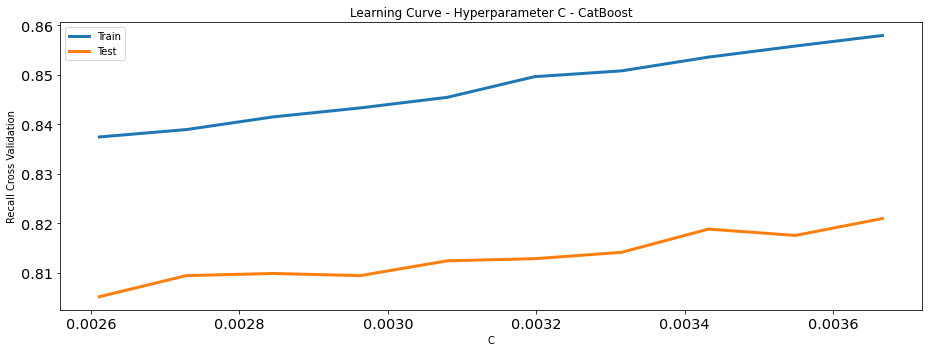

In [91]:
# learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20
import numpy as np
param_values = [float(x) for x in np.linspace(start = 0.002611111111111111, stop = 0.0036666666666666666, num = 10)]
draw_learning_curve_CB2(param_values) 
# learning_rate = 0.0036666666666666666

In [92]:
def draw_learning_curve_CB3(param_values):
    train_scores = []
    test_scores = []
    # param = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': c, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 127, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

    for c in param_values:
        model = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent',learning_rate=0.0036666666666666666, n_estimators = c)
        model.fit(X_train, y_train)

        # eval on train
        skor_recall = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
        train_auc = skor_recall['train_score'].mean()
        train_scores.append(train_auc)

        # eval on test
        # skor_recall = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
        test_auc = skor_recall['test_score'].mean()
        test_scores.append(test_auc)

        # print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
        print(f'param value: {c}; train: {train_auc}; test: {test_auc}; selisih train-test: {train_auc-test_auc}')
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('Recall Cross Validation')
    plt.title('Learning Curve - Hyperparameter C - CatBoost')
    plt.legend()
    plt.show()
X = a[i].drop(['Churn'], axis=1)
y = a[i]['Churn']
X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


param value: 1; train: 0.6921145518182358; test: 0.6851885262333023; selisih train-test: 0.006926025584933493
param value: 106; train: 0.7646266558973446; test: 0.7257695041277131; selisih train-test: 0.03885715176963145
param value: 211; train: 0.7781897271619642; test: 0.7411349844185665; selisih train-test: 0.037054742743397706
param value: 316; train: 0.7945297205908524; test: 0.759491917700873; selisih train-test: 0.035037802889979375
param value: 421; train: 0.8063849872912874; test: 0.7812804111311575; selisih train-test: 0.025104576160129843
param value: 527; train: 0.8159963220027289; test: 0.7889663404588778; selisih train-test: 0.027029981543851056
param value: 632; train: 0.8273164309736654; test: 0.7957984801268384; selisih train-test: 0.03151795084682696
param value: 737; train: 0.8381025230331158; test: 0.8022023581725074; selisih train-test: 0.03590016486060843
param value: 842; train: 0.8456848558690524; test: 0.8068986568986569; selisih train-test: 0.03878619897039548

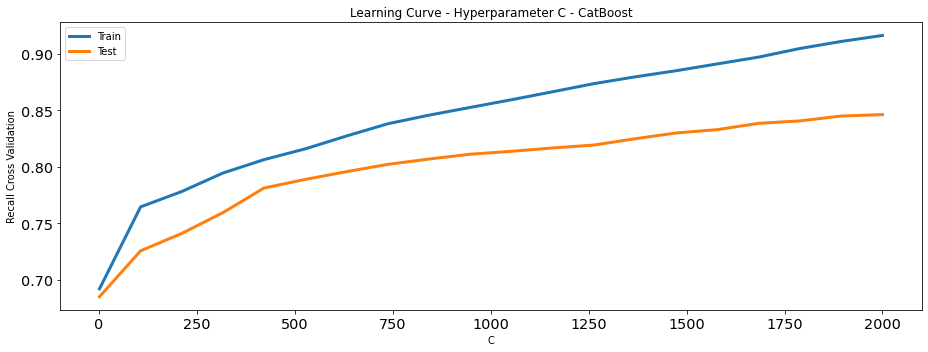

In [93]:
import numpy as np
param_values = [int(x) for x in np.linspace(start = 1, stop = 2000, num = 20)]
draw_learning_curve_CB3(param_values) 
# sudah ditemukan learning_rate = 0.0036666666666666666, kemudian estimasi n estimator
# n_estimators= 947, 527 terpilih

In [176]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import catboost as CatBoostClassifier

CB = pd.DataFrame()
CB_smote = pd.DataFrame()
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Boosting: XGBoost
  # cb = CBClassifier()
  LI2 = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent',learning_rate = 0.0036666666666666666, n_estimators= 527)
  LI2.fit(X_train,y_train)

  CB3 = predictionn(X_train, y_train, X_test, y_test, LI2, model_name=i)
  CB2 = CB3['test']
  CB1 = CB3['train']
  CB = CB.append(CB1,ignore_index=True)
  CB = CB.append(CB2,ignore_index=True)

# cat = cb.CatBoostClassifier(random_state=42, logging_level='Silent')
# cat.fit(x_train,y_train)
# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # xgboost
  # cb = CBClassifier()
  li2 = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent',learning_rate = 0.0036666666666666666, n_estimators= 527)
  li2.fit(X_train,y_train)
  

  CB_smote3 = predictionn(X_train, y_train, X_test, y_test, li2, model_name=i + 'SMOTE')
  
  CB_smote2 = CB_smote3['test']
  CB_smote1 = CB_smote3['train']
  CB_smote = CB_smote.append(CB_smote1,ignore_index=True)
  CB_smote = CB_smote.append(CB_smote2,ignore_index=True)
CB = CB.append(CB_smote)
CB


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  0.910746   0.871901  0.553806  0.677368   
1       dp_weeks_transforms_onehots  0.898757   0.846154  0.473118  0.606897   
0  dp_weeks_transforms_onehotsSMOTE  0.899608   0.873531  0.822012  0.846989   
1  dp_weeks_transforms_onehotsSMOTE  0.893238   0.839535  0.816742  0.827982   

   roc_auc_proba     score  score_recall  
0       0.947069  0.952391      0.569340  
1       0.931326  0.903379      0.499120  
0       0.961953  0.964472      0.819947  
1       0.955844  0.879692      0.800063

In [114]:
# WEEK + FIT MODEL NGA DOBEL +GET COUPON
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import catboost as CatBoostClassifier

CB = pd.DataFrame()
CB_smote = pd.DataFrame()
a = {'dp_weeks_transforms_onehots':dp_weeks_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Boosting: XGBoost
  # cb = CBClassifier()
  LI2 = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent',learning_rate = 0.0027283950617283947, n_estimators= 950)
  LI2.fit(X_train,y_train)

  CB3 = predictionn(X_train, y_train, X_test, y_test, LI2, model_name=i)
  CB2 = CB3['test']
  CB1 = CB3['train']
  CB = CB.append(CB1,ignore_index=True)
  CB = CB.append(CB2,ignore_index=True)

# cat = cb.CatBoostClassifier(random_state=42, logging_level='Silent')
# cat.fit(x_train,y_train)
# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # xgboost
  # cb = CBClassifier()
  li2 = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent',learning_rate = 0.0027283950617283947, n_estimators= 950)
  li2.fit(X_train,y_train)
  

  CB_smote3 = predictionn(X_train, y_train, X_test, y_test, li2, model_name=i + 'SMOTE')
  
  CB_smote2 = CB_smote3['test']
  CB_smote1 = CB_smote3['train']
  CB_smote = CB_smote.append(CB_smote1,ignore_index=True)
  CB_smote = CB_smote.append(CB_smote2,ignore_index=True)
CB = CB.append(CB_smote)
CB


Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error


model_name  accuracy  precision    recall        f1  \
0       dp_weeks_transforms_onehots  0.917629   0.888668  0.586614  0.706719   
1       dp_weeks_transforms_onehots  0.906750   0.871560  0.510753  0.644068   
0  dp_weeks_transforms_onehotsSMOTE  0.907084   0.886147  0.832017  0.858229   
1  dp_weeks_transforms_onehotsSMOTE  0.905338   0.866983  0.825792  0.845886   

   roc_auc_proba  score_roc_auc  score_recall  
0       0.956242       0.961550      0.604414  
1       0.941787       0.907167      0.513890  
0       0.968405       0.970874      0.834898  
1       0.961910       0.883453      0.810738

Dari hasil modeling, model CatBoost adalah model dengan hasil terbaik yaitu recall train: 0.822012 dan recall test: 0.816742

# Feature Importance

In [192]:
# model interpretation CatBoost
a = dp_weeks_transforms_onehots
X = a.drop(['Churn','CustomerID'], axis=1)
y = a['Churn']
X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # xgboost
  # cb = CBClassifier()
li2 = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent',learning_rate = 0.0036666666666666666, n_estimators= 527)
li2.fit(X_train,y_train)
import shap
explainerr = shap.Explainer(li2.predict, X_test)
shap_values_catt = explainer(X_test)

Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
Permutation explainer: 1406it [04:36,  4.86it/s]


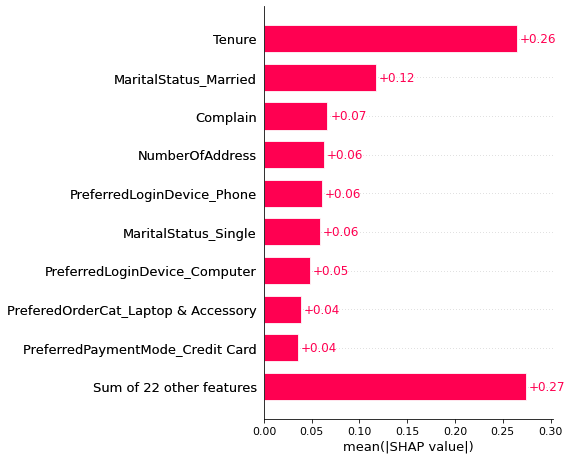

In [193]:
shap.plots.bar(shap_values_catt)

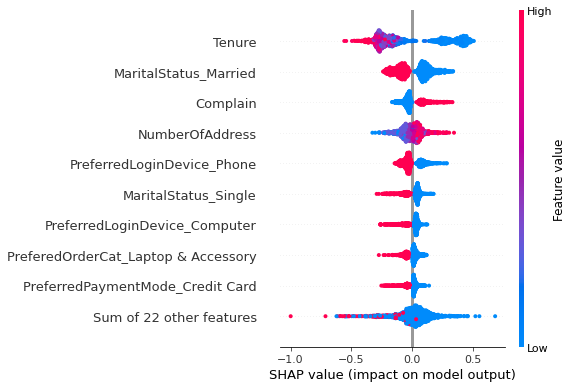

In [194]:
shap.plots.beeswarm(shap_values_catt)

Feature terpenting berturut turut berdasarkan shap value adalah tenure, complain, number of address, satisfaction score, marital status single, day since last order, warehouse to home, city tier cashback amount dan seterusnya.

Tenure:
Semakin kecil nilai tenure (biru), maka pengaruh customer akan churn semakin besar. Tenure adalah feature yang paling mempengaruhi customer akan churn atau tidak.

Complain:
Semakin besar angka complain suatu customer (merah), customer akan cenderung churn (shap value positif)

Number of address:
Banyaknya alamat yang dimiliki seorang customer sebagai tujuan pengiriman juga memberikan dampak yang cukup besar pada tingkat customer itu sendiri. Semakin banyak alamat semakin positif seorang customer akan churn.

# Bussiness Insight

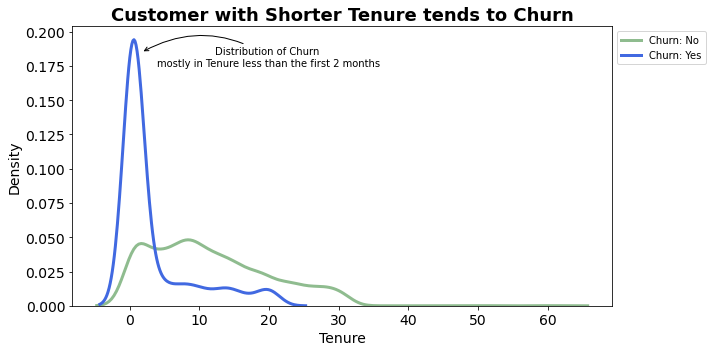

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'darkseagreen', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'royalblue', label= 'Churn: Yes', ax=ax)

ax.set_title('Customer with Shorter Tenure tends to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Tenure', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


ax.annotate('Distribution of Churn \nmostly in Tenure less than the first 2 months', 
            xy=(1.75, 0.185), xytext=(20, 0.175), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center');

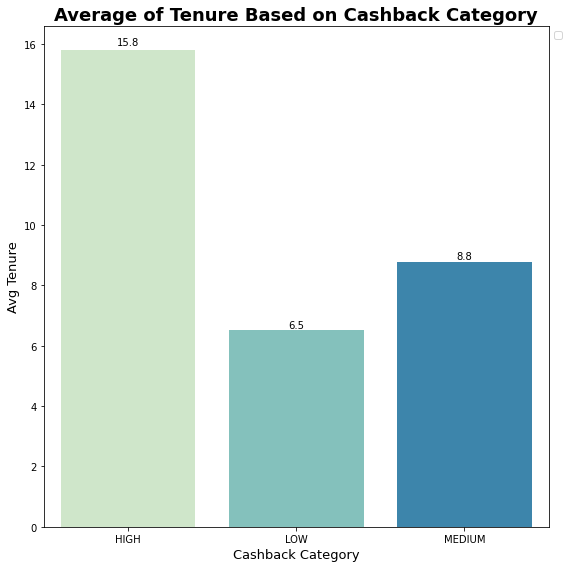

In [ ]:
#melakukan kategorisasi cashback amount
df0=df['CashbackAmount'].reset_index()
Q1 = df0['CashbackAmount'].quantile(0.25)
Q3 = df0['CashbackAmount'].quantile(0.75)

df0['CashCat']=np.where(df0['CashbackAmount']<Q1,'LOW',
                        np.where(df0['CashbackAmount'] <= Q3, 'MEDIUM', 'HIGH'))

#join kolom
df1 = df[['CustomerID','Churn','Tenure','CashbackAmount']]
df2 = df1.join(df0.set_index('CashbackAmount'), on='CashbackAmount').reset_index()
df3 = df2.groupby(['CashCat']).agg({'Tenure':'mean','CustomerID':'nunique'}).reset_index()
df3.columns= ['CashCat','AvgTenure','TotalCust']
df3

#visualisasi
plt.figure(figsize=(8,8))
ax = sns.barplot(data=df3, x='CashCat', y='AvgTenure', palette='GnBu')
plt.title('Average of Tenure Based on Cashback Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Cashback Category',fontsize=13);
plt.ylabel('Avg Tenure',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

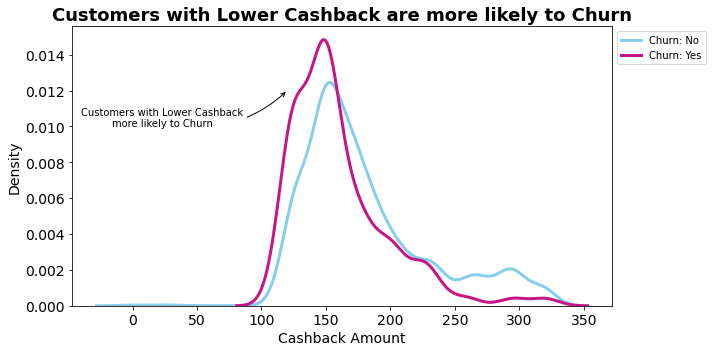

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['CashbackAmount'].dropna(), color= 'skyblue', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['CashbackAmount'].dropna(), color= 'mediumvioletred', label= 'Churn: Yes', ax=ax)

ax.set_title('Customers with Lower Cashback are more likely to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Cashback Amount', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


ax.annotate('Customers with Lower Cashback\nmore likely to Churn', 
            xy=(120, 0.012), xytext=(23, 0.01), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center');

**Insight**:
Pelanggan dengan tenure rendah cenderung mendapatkan cashback yang tergolong sedikit dan memiliki potensi untuk melakukan churn

**Business Recommendation**: Memberikan promo kepada pelanggan berupa kupon atau cashback agar pelanggan terus bertahan atau memperpanjang tenure dan kembali berbelanja di e-commerce.

- **Churn, Complain, dan PreferredOrderCat**

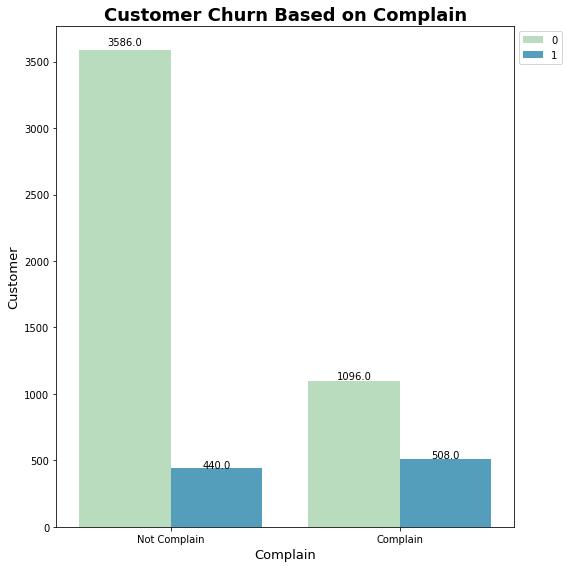

In [ ]:
dfchurncomplain = df.groupby(['Churn','Complain']).agg({'CustomerID':'nunique'}).reset_index()
dfchurncomplain['Complain'] = dfchurncomplain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})
#visualisasi
plt.figure(figsize=(8,8))
ax = sns.barplot(data=dfchurncomplain, x='Complain', y='CustomerID', hue='Churn', palette='GnBu')
plt.title('Customer Churn Based on Complain', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Complain',fontsize=13);
plt.ylabel('Customer',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

In [ ]:
dfcategory0=df.groupby(['PreferedOrderCat','Churn', 'Complain',]).agg({'CustomerID':'count'}).reset_index()
dfcategory0['Complain'] = dfcategory0['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

dfcategory0

PreferedOrderCat  Churn      Complain  CustomerID
0              Fashion      0  Not Complain         508
1              Fashion      0      Complain         190
2              Fashion      1  Not Complain          76
3              Fashion      1      Complain          52
4              Grocery      0  Not Complain         276
5              Grocery      0      Complain         114
6              Grocery      1  Not Complain           8
7              Grocery      1      Complain          12
8   Laptop & Accessory      0  Not Complain        1386
9   Laptop & Accessory      0      Complain         454
10  Laptop & Accessory      1  Not Complain         106
11  Laptop & Accessory      1      Complain         104
12        Mobile Phone      0  Not Complain        1228
13        Mobile Phone      0      Complain         282
14        Mobile Phone      1  Not Complain         242
15        Mobile Phone      1      Complain         328
16              Others      0  Not Complain         188
17              Others      0      Complain          56
18              Others      1  Not Complain           8
19              Others      1      Complain          12

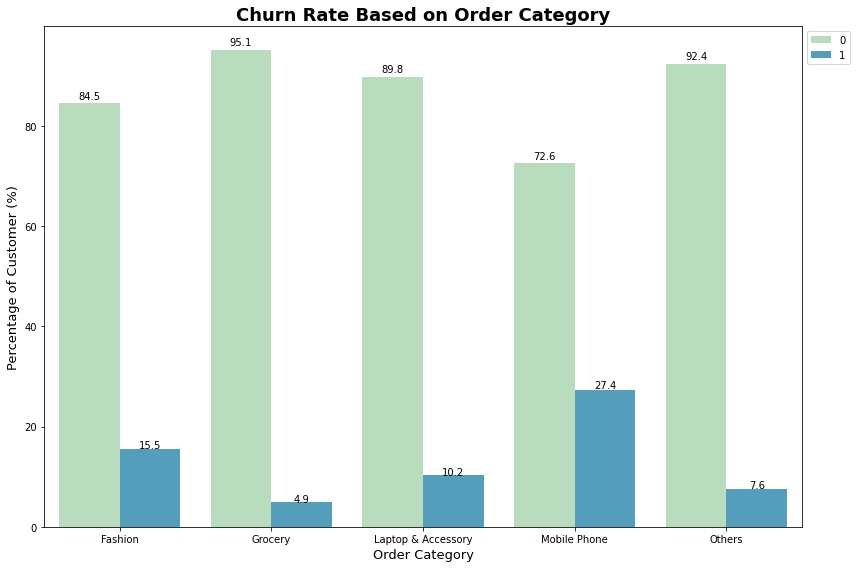

In [ ]:
dfcategory=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()

dfcategory1 = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
dfcategory2 = dfcategory.merge(dfcategory1, how='left',
              on='PreferedOrderCat')

dfcategory2.columns = ['PreferedOrderCat','Churn','Num_Customer','AllCustomer']
dfcategory2['Ratio'] = (dfcategory2['Num_Customer'] / dfcategory2['AllCustomer'] * 100.0).round(2)

#visualisasi
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dfcategory2, x='PreferedOrderCat', y='Ratio', hue='Churn', palette='GnBu')
plt.title('Churn Rate Based on Order Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

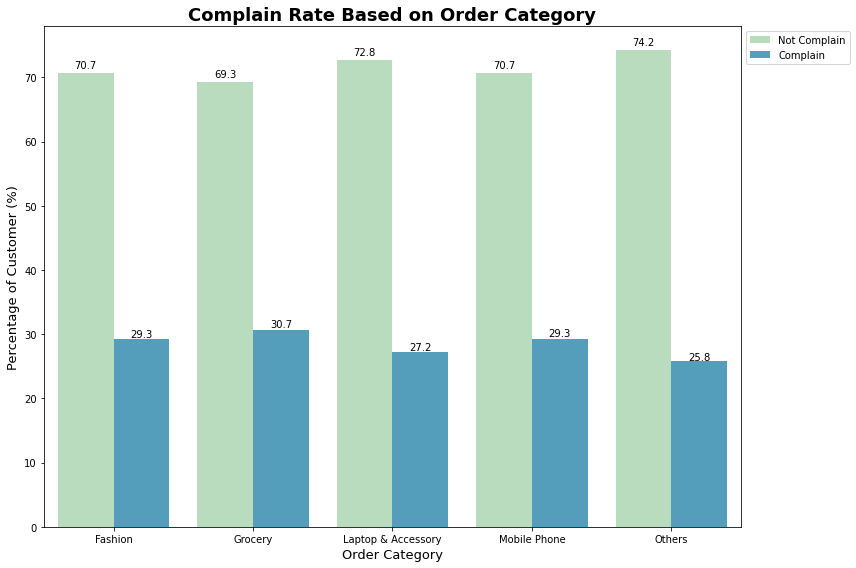

In [ ]:
dfcomplain = df.groupby(['PreferedOrderCat','Complain']).agg({'CustomerID':'nunique'}).reset_index()
dfcomplain['Complain'] = dfcomplain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

dfcomplain2 = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
dfcomplain3 = dfcomplain.merge(dfcomplain2, how='left',
              on='PreferedOrderCat')

dfcomplain3.columns = ['PreferedOrderCat','Complain','Num_Customer','AllCustomer']
dfcomplain3['Ratio'] = (dfcomplain3['Num_Customer'] / dfcomplain3['AllCustomer'] * 100.0).round(2)

#visualisasi
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dfcomplain3, x='PreferedOrderCat', y='Ratio', hue='Complain', palette='GnBu')
plt.title('Complain Rate Based on Order Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

**Insight**: 
- Pelanggan yang melakukan churn karena komplain lebih tinggi dibanding yang tidak komplain dan mayoritas membeli mobile phone
- Komplain paling banyak dilakukan oleh pelanggan membeli grocery atau kebutuhan sehari-hari, lalu disusul mobile phone dan fashion

**Business Recommendation**:
- Bagi pelanggan yang baru saja membeli barang elektronik, cross-selling dapat dilakukan dengan menawarkan aksesoris elektronik, seperti keyboard, mouse, dll
- Untuk grocery, menawarkan service pengiriman cepat untuk menjaga kualitas produk
- Untuk fashion dan mobile phone, menawarkan tampilan foto produk yang original atau asli dan deskripsi produk yang jelas

# Action

- Memberikan promo kepada pelanggan berupa kupon atau cashback agar pelanggan terus bertahan atau memperpanjang tenure dan kembali berbelanja di e-commerce.
- Bagi pelanggan yang baru saja membeli barang elektronik, cross-selling dapat dilakukan dengan menawarkan aksesoris elektronik, seperti keyboard, mouse, dll
- Untuk grocery, menawarkan service pengiriman cepat untuk menjaga kualitas produk
- Untuk fashion dan mobile phone, menawarkan tampilan foto produk yang original atau asli dan deskripsi produk yang jelas